### Loading data (2023 year) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/Users/sharanyasenthil/Downloads/complaints.csv')
df['Date received'] = pd.to_datetime(df['Date received'])

cols_to_consider = ['Product','Sub-product','Issue','Sub-issue','Consumer complaint narrative','Company public response','Company',
                    'State', 'ZIP code', 'Date received']
df_new = df[cols_to_consider]

df_new = df_new.dropna()

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/1385770917.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/sharanyasenthil/Downloads/complaints.csv')


In [3]:
df_2023 = df_new[df_new['Date received'].dt.year.isin([2023])].reset_index(drop=True)

product_map = {'Credit reporting or other personal consumer reports' : 'Credit Reporting',
               'Credit reporting, credit repair services, or other personal consumer reports' : 'Credit Reporting',
               'Payday loan, title loan, personal loan, or advance loan' : 'Loans / Mortgage',
               'Payday loan, title loan, or personal loan' : 'Loans / Mortgage',
               'Student loan' : 'Loans / Mortgage',
               'Vehicle loan or lease' : 'Loans / Mortgage',
               'Debt collection' : 'Debt collection',
               'Credit card or prepaid card' : 'Credit/Prepaid Card',
               'Credit card' : 'Credit/Prepaid Card',
               'Prepaid card' : 'Credit/Prepaid Card',
               'Mortgage' : 'Loans / Mortgage',
               'Checking or savings account' : 'Checking or savings account'  
              }

df_2023.loc[:,'Product'] = df_2023['Product'].map(product_map)

In [4]:
df_2023.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Date received
0,Checking or savings account,Other banking product or service,Opening an account,Account opened without my consent or knowledge,Date : XXXX XXXXo : XXXX XXXX XXXX / XXXX XXXX...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NC,27513,2023-12-29
1,Credit Reporting,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,I have previously disputed this item with you ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MN,55124,2023-12-29
2,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I kindly request that you update my credit rep...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60621,2023-12-28
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I implore you to conduct a comprehensive inves...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NJ,08723,2023-12-28
4,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77377,2023-11-27


In [5]:
df_2023.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Date received'],
      dtype='object')

In [6]:
df_2023.shape

(265315, 10)

### Complaint pre-processing

In [7]:
df_2023['complaint length'] = df_2023['Consumer complaint narrative'].apply(lambda x : len(x))

In [8]:
df_2023 = df_2023[df_2023['complaint length'] > 20]

complaints_to_exclude = ['See document attached', 'See the attached documents.', 'Incorrect information on my credit report', 'incorrect information on my credit report',
'please see attached file','Please see documents Attached','Incorrect information on my credit report.', 'Please see attached file', 'see attached',
'See attached', 'SEE ATTACHED DOCUMENTS', 'See Attached', 'SEE ATTACHMENT', 'SEE ATTACHMENTS', 
'XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX']

df_2023 = df_2023[~df_2023['Consumer complaint narrative'].isin(complaints_to_exclude)]

### Categories consideration

In [9]:
df_2023_subset = df_2023[['Consumer complaint narrative','Product','Sub-product','Issue','Sub-issue']]
df_2023_subset.shape

(264968, 5)

In [10]:
df_2023_subset['Product'].value_counts()

Product
Credit Reporting               213403
Credit/Prepaid Card             16319
Checking or savings account     15143
Debt collection                 11767
Loans / Mortgage                 8336
Name: count, dtype: int64

In [11]:
df_2023_subset['Sub-issue'].value_counts()

Sub-issue
Information belongs to someone else                                      57877
Reporting company used your report improperly                            48781
Their investigation did not fix an error on your report                  45407
Credit inquiries on your report that you don't recognize                 13150
Account status incorrect                                                 10271
                                                                         ...  
Issues with financial aid services                                           1
Threatened to turn you in to immigration or deport you                       1
Did not receive car title                                                    1
Problem adding money                                                         1
Cannot graduate, receive diploma, or get transcript due to money owed        1
Name: count, Length: 206, dtype: int64

In [12]:
sub_issues_to_consider = df_2023_subset['Sub-issue'].value_counts()[df_2023_subset['Sub-issue'].value_counts() > 500].index

In [13]:
len(sub_issues_to_consider)

44

In [14]:
reduced_subissues = df_2023_subset[df_2023_subset['Sub-issue'].isin(sub_issues_to_consider)]

In [15]:
reduced_subissues.shape

(248065, 5)

In [16]:
reduced_subissues['Sub-issue'].value_counts()

Sub-issue
Information belongs to someone else                                                      57877
Reporting company used your report improperly                                            48781
Their investigation did not fix an error on your report                                  45407
Credit inquiries on your report that you don't recognize                                 13150
Account status incorrect                                                                 10271
Account information incorrect                                                             9307
Was not notified of investigation status or results                                       9201
Investigation took more than 30 days                                                      8937
Personal information incorrect                                                            5900
Debt is not yours                                                                         2821
Deposits and withdrawals                

In [17]:
df_2023['Sub-product'].value_counts()

Sub-product
Credit reporting                              212160
General-purpose credit card or charge card     13689
Checking account                               12710
Other debt                                      3482
Loan                                            3239
I do not know                                   2832
Credit card debt                                2180
Federal student loan servicing                  2041
Store credit card                               1924
Conventional home mortgage                      1260
Other personal consumer report                  1243
Medical debt                                    1230
Savings account                                 1214
Other banking product or service                 952
Auto debt                                        823
FHA mortgage                                     532
Telecommunications debt                          482
Lease                                            438
Government benefit card           

In [18]:
sub_products_to_consider = reduced_subissues['Sub-product'].value_counts()[reduced_subissues['Sub-product'].value_counts() > 100].index
final_df_2023 = reduced_subissues[reduced_subissues['Sub-product'].isin(sub_products_to_consider)]

In [19]:
final_df_2023.shape

(247517, 5)

### Value counts

In [20]:
final_df_2023['Product'].value_counts()

Product
Credit Reporting               211695
Checking or savings account     12285
Credit/Prepaid Card             11975
Debt collection                  9380
Loans / Mortgage                 2182
Name: count, dtype: int64

In [21]:
final_df_2023['Sub-product'].value_counts()

Sub-product
Credit reporting                              210735
General-purpose credit card or charge card     10668
Checking account                               10409
Other debt                                      3041
I do not know                                   2316
Credit card debt                                1652
Federal student loan servicing                  1344
Store credit card                               1307
Medical debt                                    1053
Savings account                                  989
Other personal consumer report                   960
Loan                                             732
Other banking product or service                 725
Auto debt                                        581
Telecommunications debt                          419
Rental debt                                      179
CD (Certificate of Deposit)                      162
Mortgage debt                                    139
Conventional home mortgage        

In [22]:
final_df_2023['Issue'].value_counts()

Issue
Incorrect information on your report                                                87200
Improper use of your report                                                         61868
Problem with a credit reporting company's investigation into an existing problem    45371
Problem with a company's investigation into an existing problem                     20985
Managing an account                                                                  7367
Attempts to collect debt not owed                                                    5453
Problem with a purchase shown on your statement                                      3253
Written notification about debt                                                      2404
Closing an account                                                                   1975
Problem with a lender or other company charging your account                         1378
Dealing with your lender or servicer                                                 1293
Unab

In [56]:
issue_mapping = {
    # Spreading out the large categories
    "Incorrect information on your report": "Information Issues",
    "Improper use of your report": "Information Issues",
    
    # Combining all investigation-related issues into one
    "Problem with a credit reporting company's investigation into an existing problem": "Investigation Issues",
    "Problem with a company's investigation into an existing problem": "Investigation Issues",
    "Problem with a company's investigation into an existing issue": "Investigation Issues",

    # Merge account issues with managing loans and leases
    "Managing an account": "Account and Loan Management Issues",
    "Closing an account": "Account and Loan Management Issues",
    "Problem with a lender or other company charging your account": "Account and Loan Management Issues",
    "Dealing with your lender or servicer": "Account and Loan Management Issues",
    "Managing the loan or lease": "Account and Loan Management Issues",
    "Opening an account": "Account and Loan Management Issues",

    # Combine debt and credit issues with payment issues
    "Attempts to collect debt not owed": "Debt, Credit, and Payment Issues",
    "Written notification about debt": "Debt, Credit, and Payment Issues",
    "Problem when making payments": "Debt, Credit, and Payment Issues",
    "Fees or interest": "Debt, Credit, and Payment Issues",
    "Other features, terms, or problems": "Debt, Credit, and Payment Issues",
    "Took or threatened to take negative or legal action": "Debt, Credit, and Payment Issues",

    # Purchase issues could be combined with transaction issues for more balance
    "Problem with a purchase shown on your statement": "Transaction and Purchase Issues",
    "Problem caused by your funds being low": "Transaction and Purchase Issues",

    # Group all credit report and monitoring issues
    "Unable to get your credit report or credit score": "Credit Reporting and Monitoring Issues",
    "Credit monitoring or identity theft protection services": "Credit Reporting and Monitoring Issues",
    "Identity theft protection or other monitoring services": "Credit Reporting and Monitoring Issues",

    # False statements or representation can be a legal issue
    "False statements or representation": "Legal Issues",
    
    # Getting a credit card is a very specific issue, could be merged with general account issues
    "Getting a credit card": "Account and Loan Management Issues",
}




In [57]:
df['Issue_Category'] = df['Issue'].map(issue_mapping)

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/3330299710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issue_Category'] = df['Issue'].map(issue_mapping)


In [58]:
df['Issue_Category'].fillna('Other/General Issues', inplace=True)

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/1571349518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issue_Category'].fillna('Other/General Issues', inplace=True)


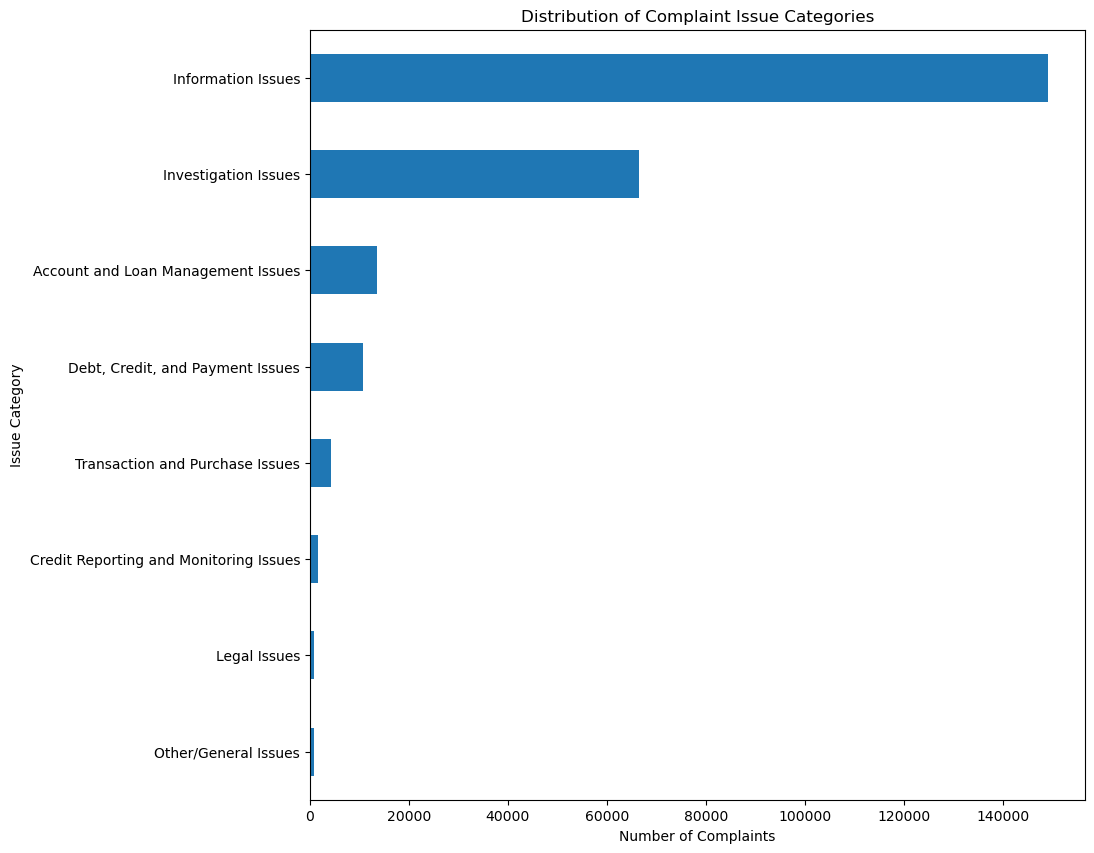

In [59]:
category_counts = df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [76]:
df_2022 = df_new[df_new['Date received'].dt.year.isin([2022])].reset_index(drop=True)

In [77]:
df_2022['complaint length'] = df_2022['Consumer complaint narrative'].apply(lambda x : len(x))

In [78]:
df_2022 = df_2022[df_2022['complaint length'] > 20]
df_2022 = df_2022[~df_2022['Consumer complaint narrative'].isin(complaints_to_exclude)]

In [79]:
df_2022_subset = df_2022[['Consumer complaint narrative','Product','Sub-product','Issue','Sub-issue']]
df_2022_subset.shape

(176934, 5)

In [81]:
sub_issues_to_consider = df_2022_subset['Sub-issue'].value_counts()[df_2022_subset['Sub-issue'].value_counts() > 500].index

In [82]:
reduced_subissues = df_2023_subset[df_2023_subset['Sub-issue'].isin(sub_issues_to_consider)]

In [83]:
sub_products_to_consider = reduced_subissues['Sub-product'].value_counts()[reduced_subissues['Sub-product'].value_counts() > 100].index
final_df_2022 = reduced_subissues[reduced_subissues['Sub-product'].isin(sub_products_to_consider)]

In [84]:
final_df_2022['Sub-issue'].value_counts()

Sub-issue
Information belongs to someone else                                                      57844
Reporting company used your report improperly                                            48720
Their investigation did not fix an error on your report                                  45392
Credit inquiries on your report that you don't recognize                                 13135
Account status incorrect                                                                 10200
Account information incorrect                                                             9252
Was not notified of investigation status or results                                       9200
Investigation took more than 30 days                                                      8926
Personal information incorrect                                                            5900
Debt is not yours                                                                         2785
Deposits and withdrawals                

In [85]:
final_df_2022['Issue_Category'] = final_df_2022['Issue'].map(issue_mapping)

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/4063632531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2022['Issue_Category'] = final_df_2022['Issue'].map(issue_mapping)


In [86]:
final_df_2022['Issue_Category'].fillna('Other/General Issues', inplace=True)

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/418608815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2022['Issue_Category'].fillna('Other/General Issues', inplace=True)


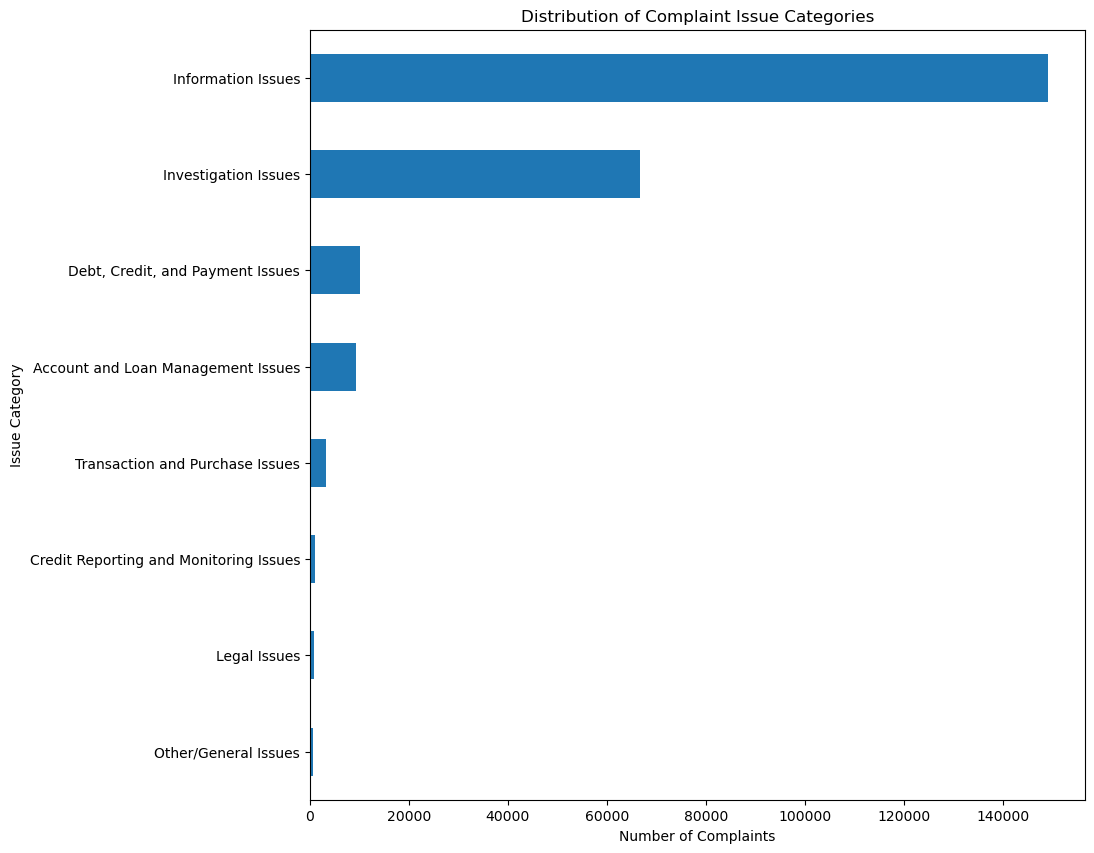

In [87]:
category_counts = final_df_2022['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [88]:
filtered_final_df_2022 = final_df_2022[final_df_2022['Issue_Category'] != "Information Issues"]


In [89]:
combined_df = pd.concat([df, filtered_final_df_2022], ignore_index=True)

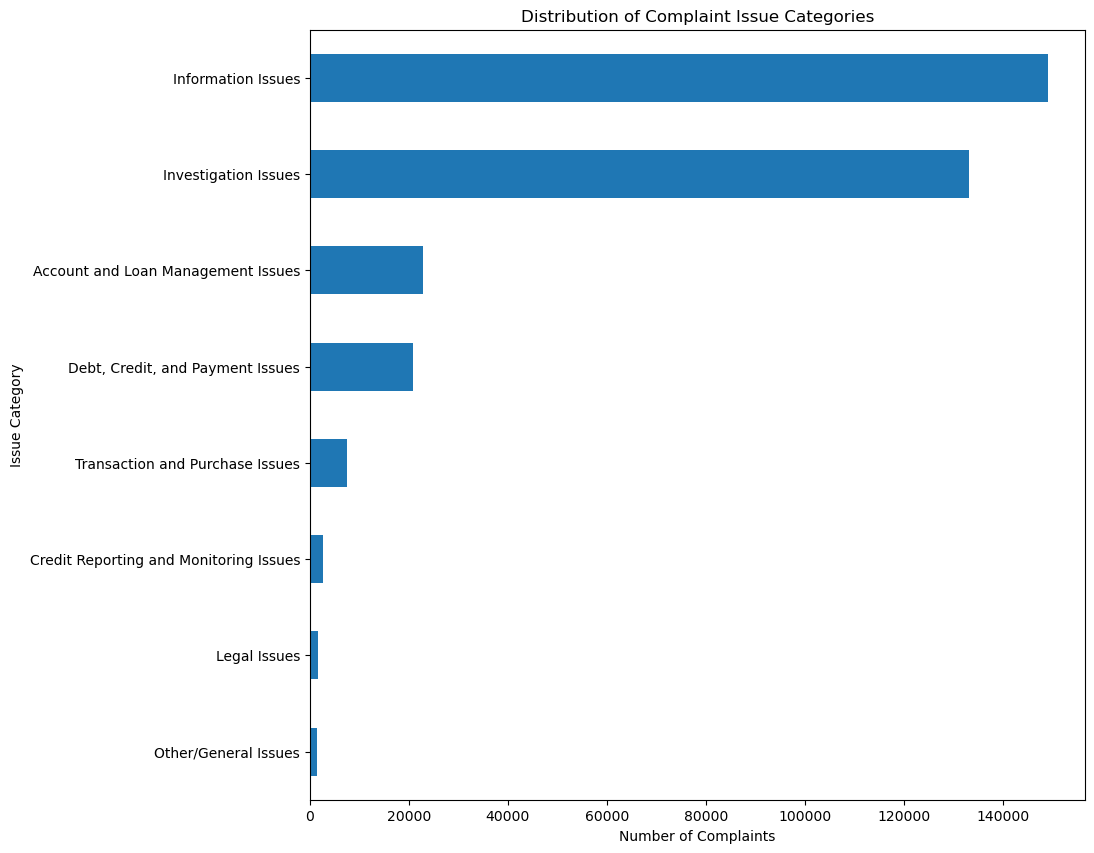

In [90]:
combined_df['Issue_Category'] = combined_df['Issue'].map(issue_mapping)
combined_df['Issue_Category'].fillna('Other/General Issues', inplace=True)
category_counts = combined_df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [91]:
df_2021 = df_new[df_new['Date received'].dt.year.isin([2021])].reset_index(drop=True)
df_2021['complaint length'] = df_2021['Consumer complaint narrative'].apply(lambda x : len(x))
df_2021 = df_2021[df_2021['complaint length'] > 20]
df_2021 = df_2021[~df_2021['Consumer complaint narrative'].isin(complaints_to_exclude)]
df_2021_subset = df_2021[['Consumer complaint narrative','Product','Sub-product','Issue','Sub-issue']]
sub_issues_to_consider = df_2021_subset['Sub-issue'].value_counts()[df_2021_subset['Sub-issue'].value_counts() > 500].index
reduced_subissues = df_2021_subset[df_2021_subset['Sub-issue'].isin(sub_issues_to_consider)]
sub_products_to_consider = reduced_subissues['Sub-product'].value_counts()[reduced_subissues['Sub-product'].value_counts() > 100].index
final_df_2021 = reduced_subissues[reduced_subissues['Sub-product'].isin(sub_products_to_consider)]
final_df_2021['Issue_Category'] = final_df_2021['Issue'].map(issue_mapping)
final_df_2021['Issue_Category'].fillna('Other/General Issues', inplace=True)

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/3851955465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2021['Issue_Category'] = final_df_2021['Issue'].map(issue_mapping)
/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/3851955465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2021['Issue_Category'].fillna('Other/General Issues', inplace=True)


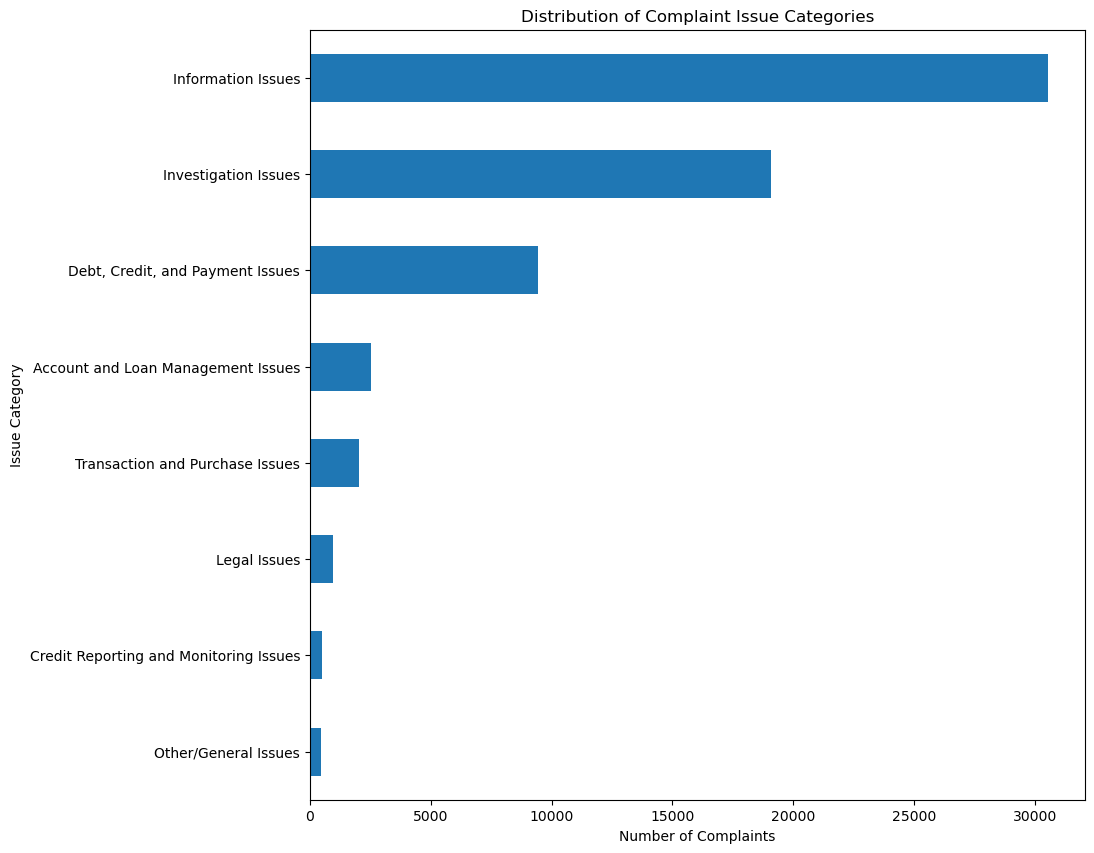

In [92]:
category_counts = final_df_2021['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [97]:
filtered_final_df_2021 = final_df_2021[~final_df_2021['Issue_Category'].isin(["Information Issues", "Investigation Issues"])]

In [98]:
combined_df = pd.concat([combined_df, filtered_final_df_2021], ignore_index=True)

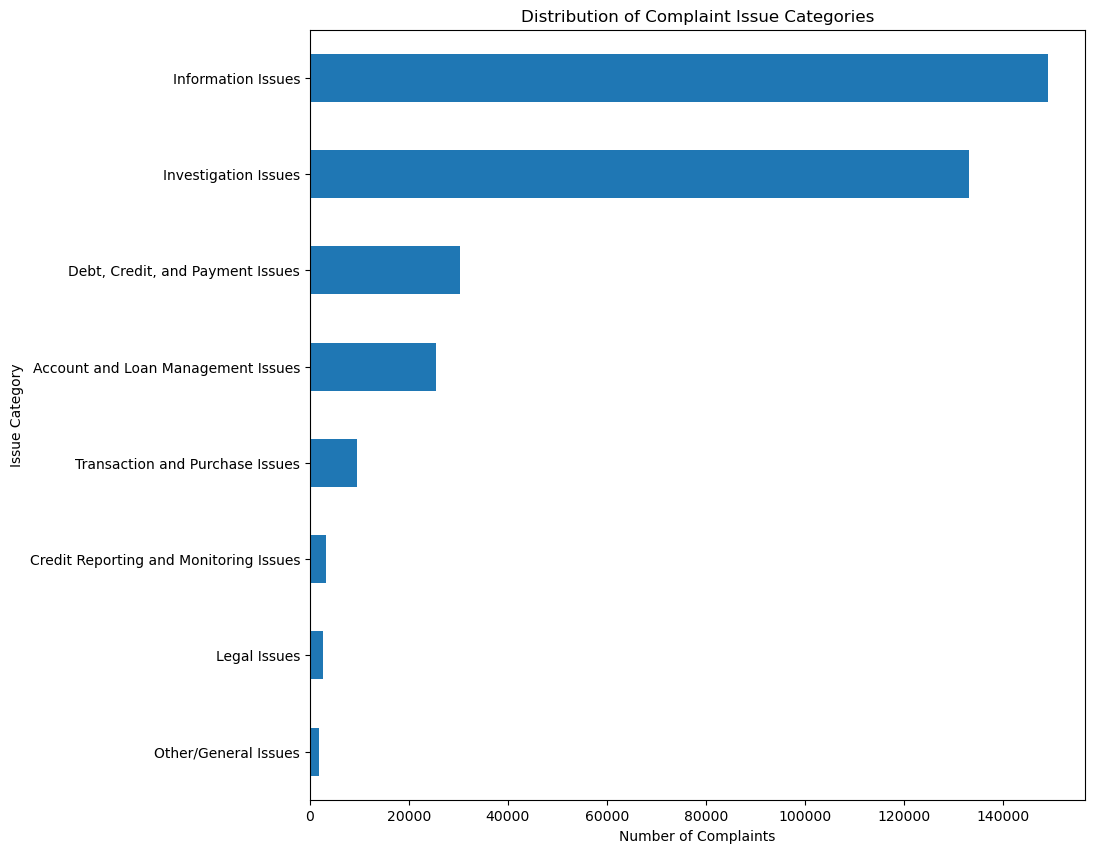

In [99]:
category_counts = combined_df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [100]:
df_2020 = df_new[df_new['Date received'].dt.year.isin([2020])].reset_index(drop=True)
df_2020['complaint length'] = df_2020['Consumer complaint narrative'].apply(lambda x : len(x))
df_2020 = df_2020[df_2020['complaint length'] > 20]
df_2020 = df_2020[~df_2020['Consumer complaint narrative'].isin(complaints_to_exclude)]
df_2020_subset = df_2020[['Consumer complaint narrative','Product','Sub-product','Issue','Sub-issue']]
sub_issues_to_consider = df_2020_subset['Sub-issue'].value_counts()[df_2020_subset['Sub-issue'].value_counts() > 500].index
reduced_subissues = df_2020_subset[df_2020_subset['Sub-issue'].isin(sub_issues_to_consider)]
sub_products_to_consider = reduced_subissues['Sub-product'].value_counts()[reduced_subissues['Sub-product'].value_counts() > 100].index
final_df_2020 = reduced_subissues[reduced_subissues['Sub-product'].isin(sub_products_to_consider)]
final_df_2020['Issue_Category'] = final_df_2020['Issue'].map(issue_mapping)
final_df_2020['Issue_Category'].fillna('Other/General Issues', inplace=True)

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/321519257.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2020['Issue_Category'] = final_df_2020['Issue'].map(issue_mapping)
/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/321519257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2020['Issue_Category'].fillna('Other/General Issues', inplace=True)


In [101]:
filtered_final_df_2020 = final_df_2020[~final_df_2020['Issue_Category'].isin(["Information Issues", "Investigation Issues"])]
combined_df = pd.concat([combined_df, filtered_final_df_2021], ignore_index=True)

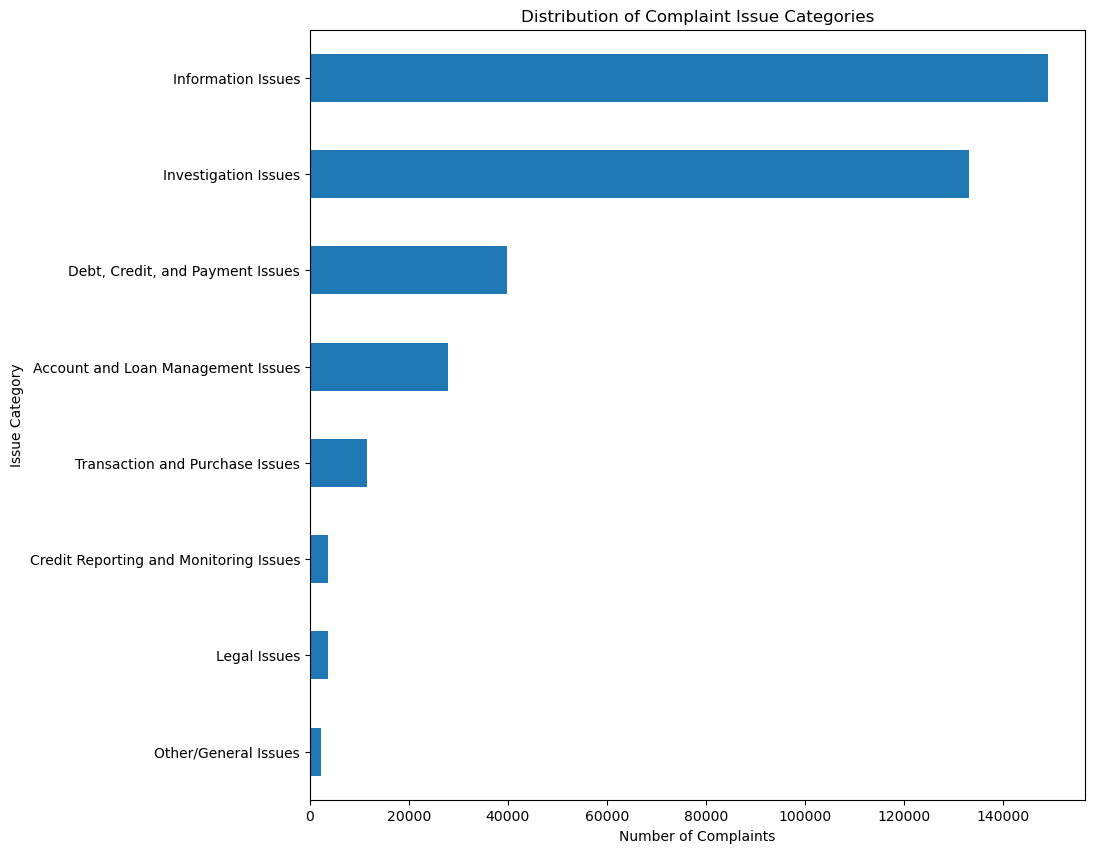

In [102]:
category_counts = combined_df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_46192/2104126244.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit the legend and the labels


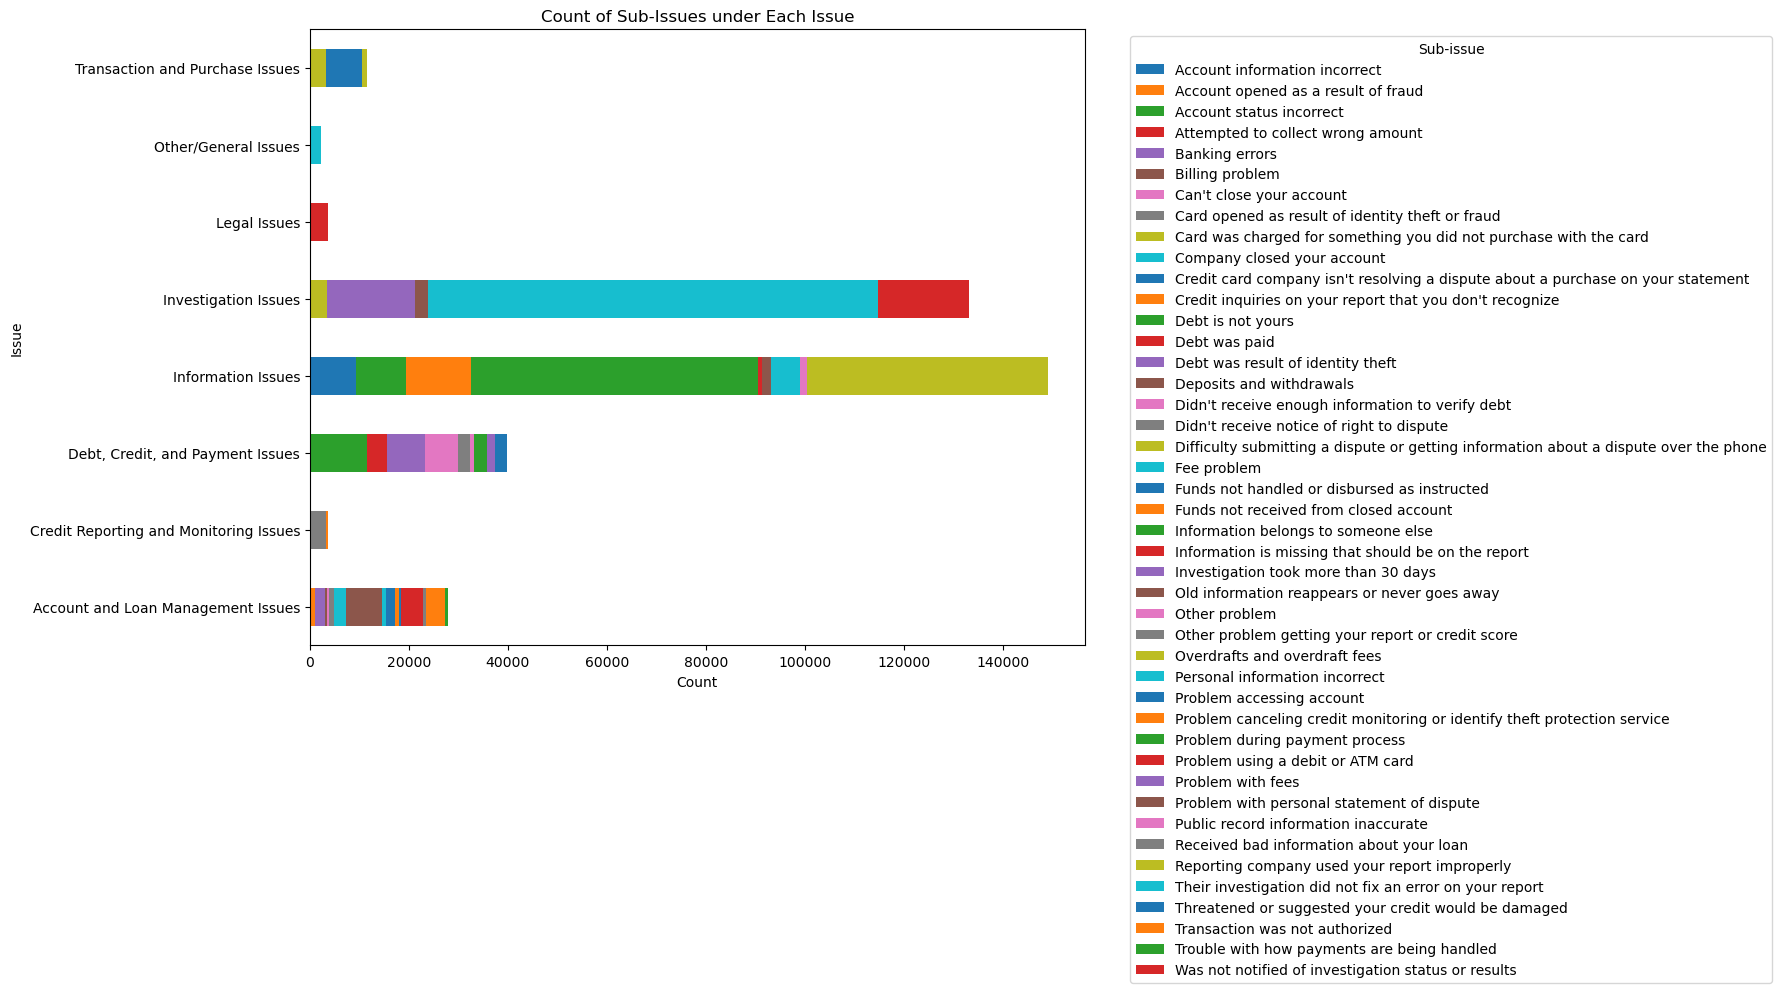

In [108]:
issue_sub_issue_counts = combined_df.groupby('Issue_Category')['Sub-issue'].value_counts().unstack()

# Plot horizontal bar plot
issue_sub_issue_counts.plot(kind='barh', stacked=True, figsize=(10, 8))

plt.title('Count of Sub-Issues under Each Issue')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.legend(title='Sub-issue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend and the labels

# Show plot
plt.show()

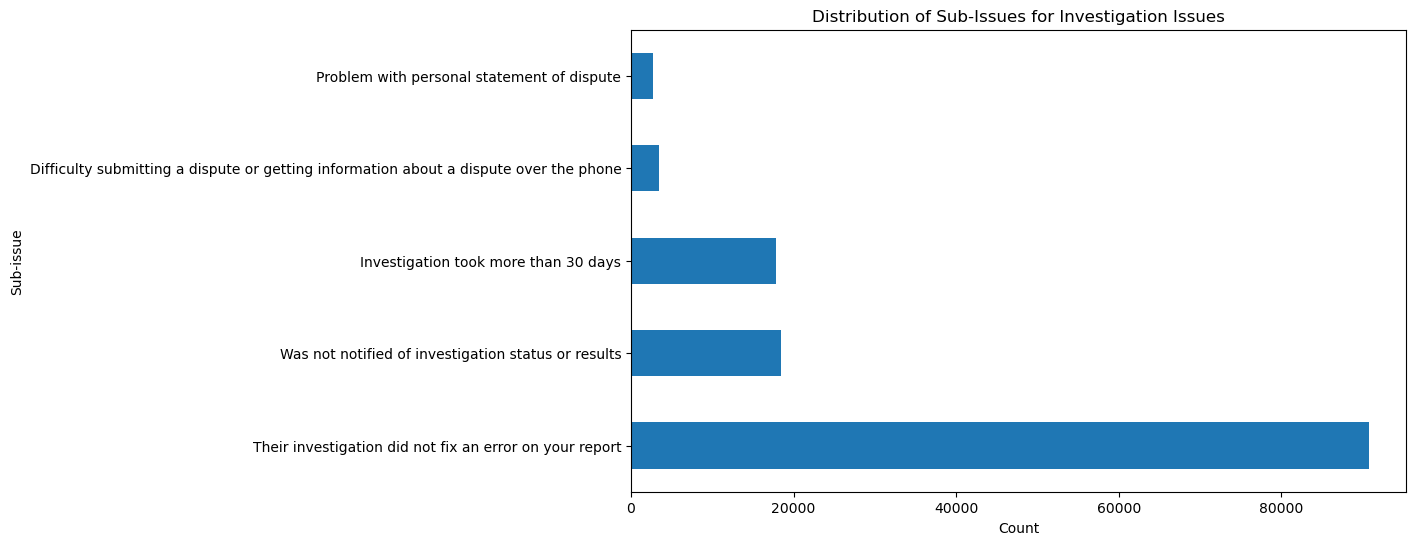

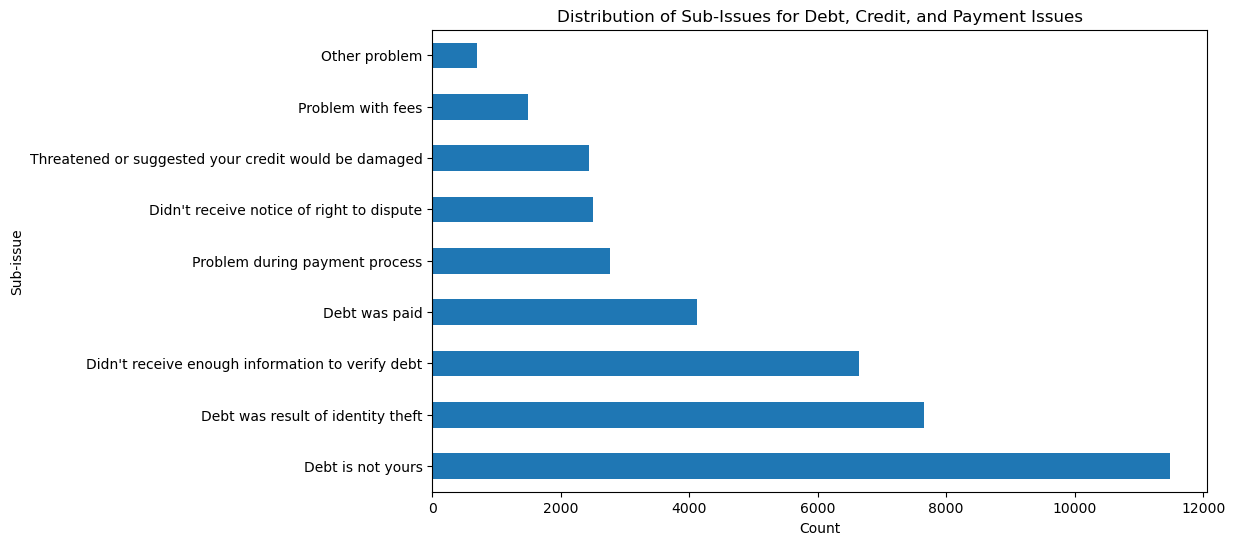

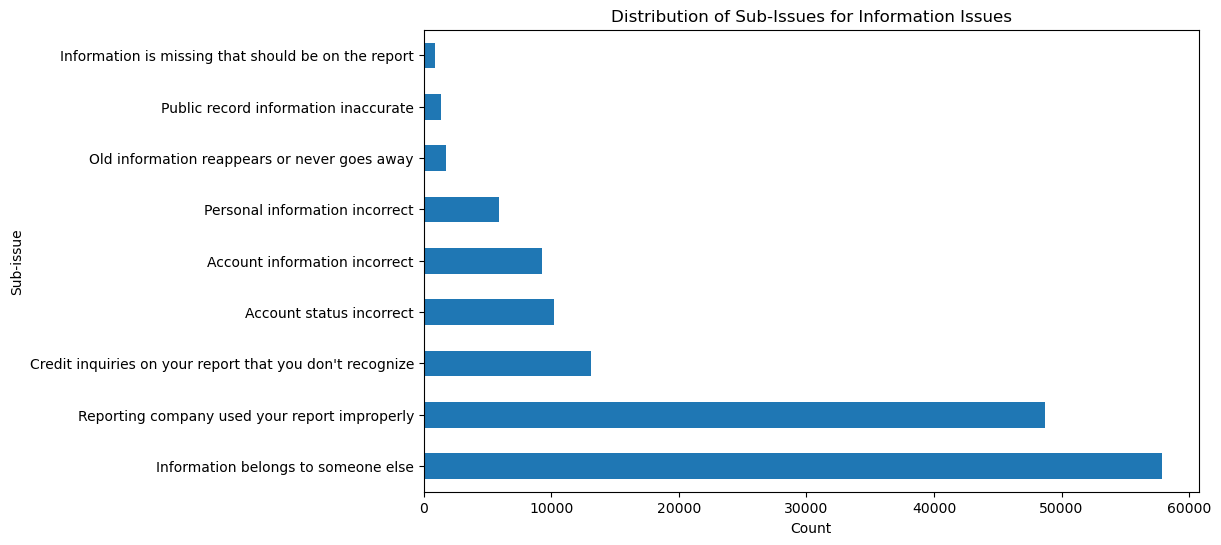

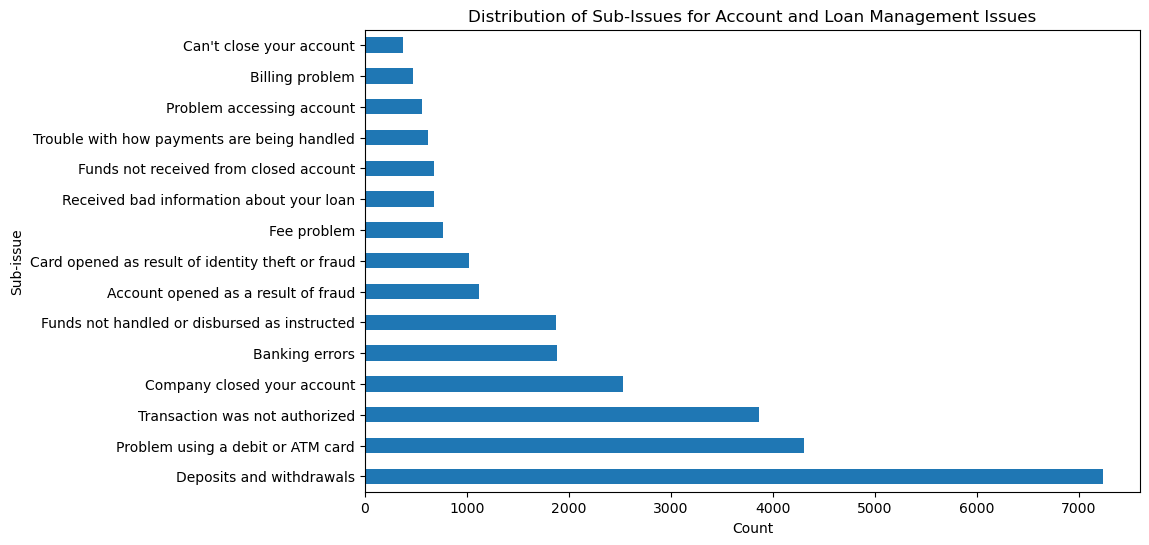

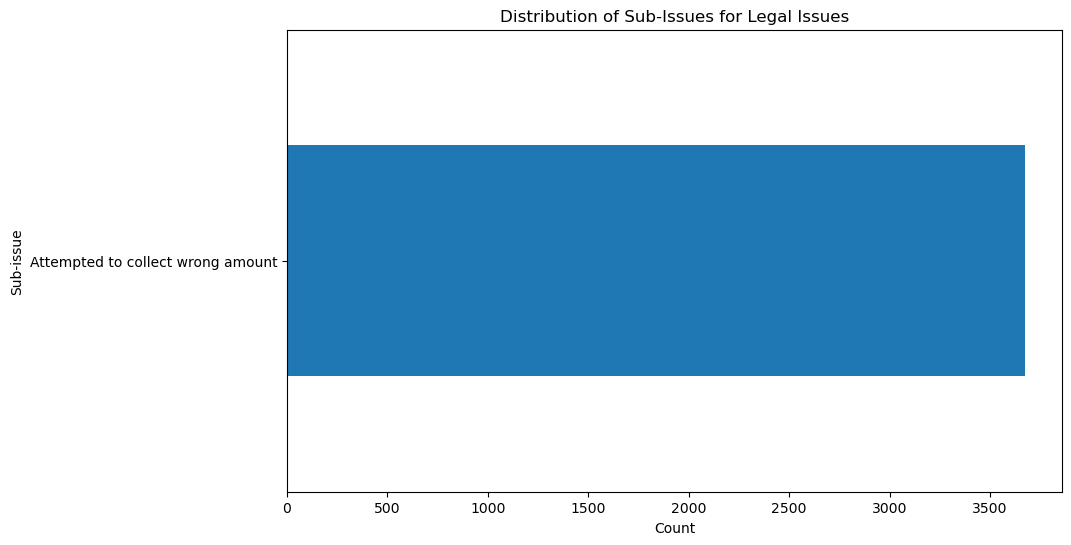

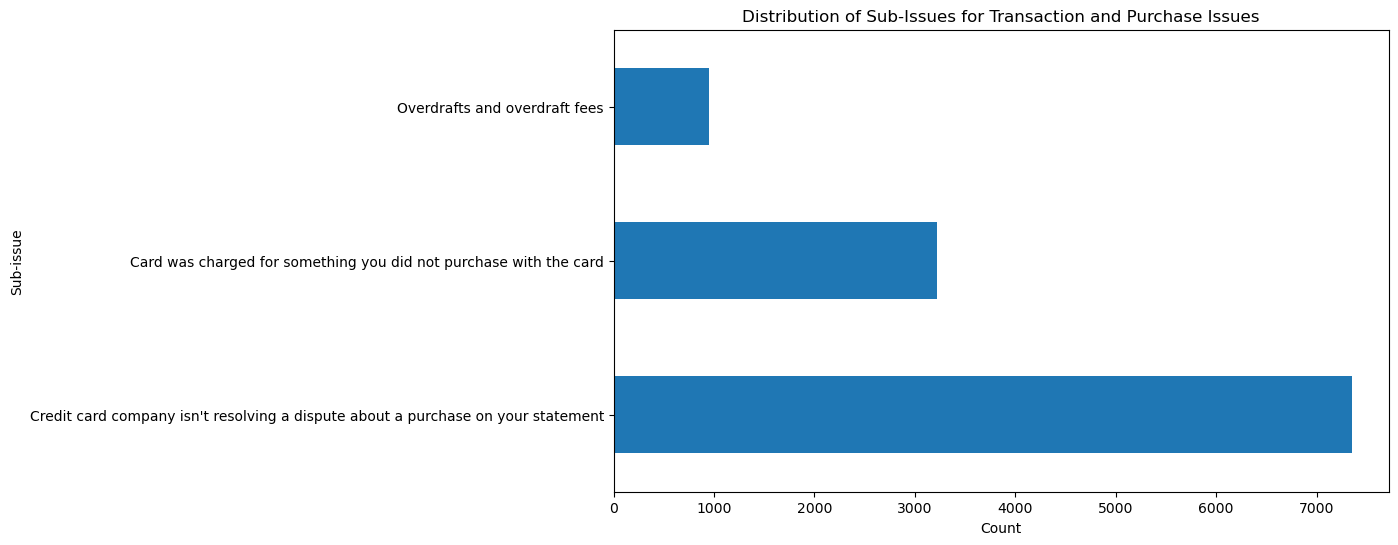

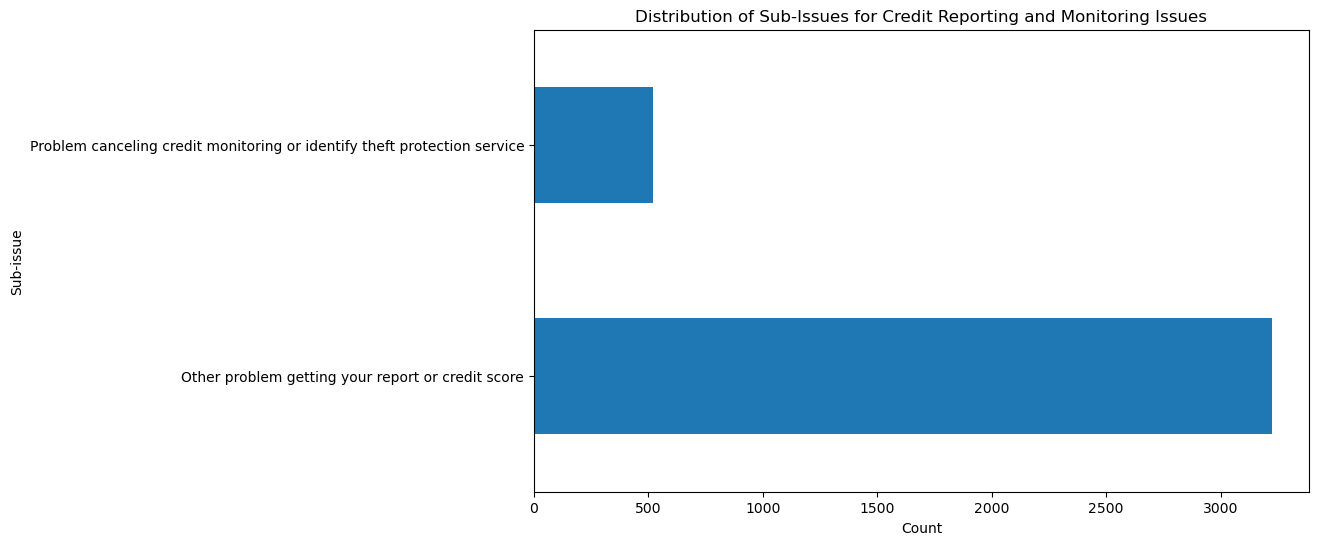

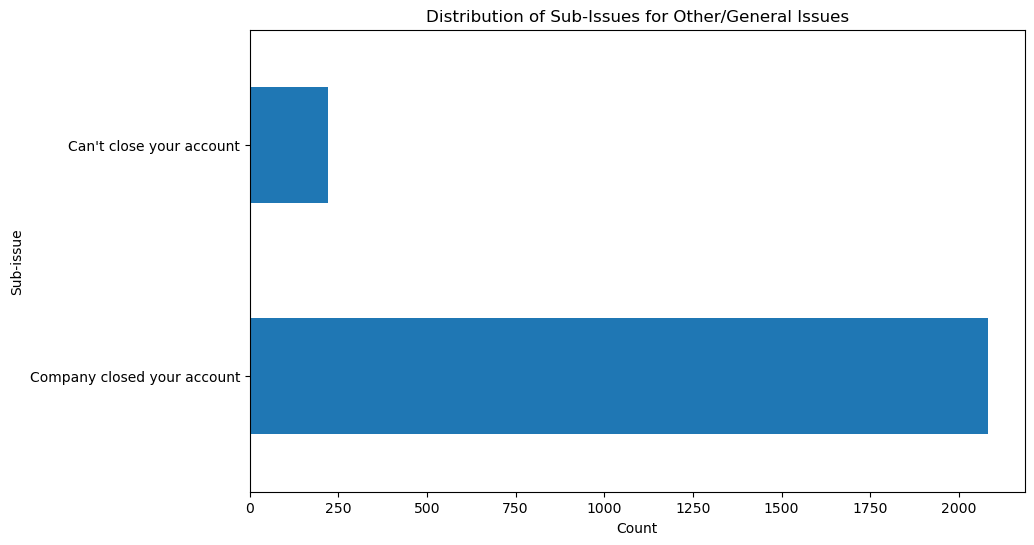

In [110]:
main_issues = combined_df['Issue_Category'].unique()
for issue in main_issues:
    # Filter the DataFrame for the current main issue
    sub_issues_data = combined_df[combined_df['Issue_Category'] == issue]
    
    # Get the count of each sub-issue
    sub_issue_counts = sub_issues_data['Sub-issue'].value_counts()
    
    # Create the bar plot
    sub_issue_counts.plot(kind='barh', figsize=(10, 6))
    
    # Add titles and labels
    plt.title(f'Distribution of Sub-Issues for {issue}')
    plt.xlabel('Count')
    plt.ylabel('Sub-issue')
    
    # Show the plot
    plt.show()

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [113]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(solver='liblinear')),
])

X_train, X_test, y_train, y_test = train_test_split(
    combined_df['Consumer complaint narrative'], 
    combined_df['Issue_Category'], 
    test_size=0.2, 
    random_state=42
)

pipeline.fit(X_train, y_train)

y_pred_main_issue = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_main_issue))

                                        precision    recall  f1-score   support

    Account and Loan Management Issues       0.86      0.91      0.88      5732
Credit Reporting and Monitoring Issues       0.76      0.45      0.56       771
      Debt, Credit, and Payment Issues       0.76      0.74      0.75      8072
                    Information Issues       0.81      0.85      0.83     29730
                  Investigation Issues       0.83      0.81      0.82     26520
                          Legal Issues       0.83      0.03      0.06       698
                  Other/General Issues       0.79      0.53      0.63       449
       Transaction and Purchase Issues       0.79      0.74      0.76      2276

                              accuracy                           0.81     74248
                             macro avg       0.80      0.63      0.66     74248
                          weighted avg       0.81      0.81      0.81     74248



In [114]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)),
])

X_train, X_test, y_train, y_test = train_test_split(
    combined_df['Consumer complaint narrative'], 
    combined_df['Issue_Category'], 
    test_size=0.2, 
    random_state=42
)

pipeline.fit(X_train, y_train)

y_pred_main_issue = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_main_issue))

                                        precision    recall  f1-score   support

    Account and Loan Management Issues       0.90      0.98      0.93      5732
Credit Reporting and Monitoring Issues       0.99      0.81      0.89       771
      Debt, Credit, and Payment Issues       0.93      0.93      0.93      8072
                    Information Issues       0.94      0.95      0.95     29730
                  Investigation Issues       0.96      0.96      0.96     26520
                          Legal Issues       0.99      0.83      0.90       698
                  Other/General Issues       0.99      0.72      0.83       449
       Transaction and Purchase Issues       0.98      0.83      0.90      2276

                              accuracy                           0.95     74248
                             macro avg       0.96      0.88      0.91     74248
                          weighted avg       0.95      0.95      0.94     74248



In [27]:
final_df_2023['Sub-issue'].value_counts()

Sub-issue
Information belongs to someone else                                                      57850
Reporting company used your report improperly                                            48732
Their investigation did not fix an error on your report                                  45395
Credit inquiries on your report that you don't recognize                                 13136
Account status incorrect                                                                 10208
Account information incorrect                                                             9267
Was not notified of investigation status or results                                       9200
Investigation took more than 30 days                                                      8928
Personal information incorrect                                                            5900
Debt is not yours                                                                         2785
Deposits and withdrawals                

### Unique categories

In [24]:
print(f"Unique Product offerings: {final_df_2023['Product'].nunique()}")
print(f"Unique Sub-product offerings: {final_df_2023['Sub-product'].nunique()}")
print(f"Unique Issue offerings: {final_df_2023['Issue'].nunique()}")
print(f"Unique Sub-issue offerings: {final_df_2023['Sub-issue'].nunique()}")

Unique Product offerings: 5
Unique Sub-product offerings: 19
Unique Issue offerings: 25
Unique Sub-issue offerings: 44


In [25]:
df = final_df_2023

(247517, 5)

### Preparing the train and test splits

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
final_df_2023.head()

,Consumer complaint narrative,Product,Sub-product,Issue,Sub-issue
1,I have previously disputed this item with you ...,Credit Reporting,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days
2,I kindly request that you update my credit rep...,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft
3,I implore you to conduct a comprehensive inves...,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft
4,In accordance with the Fair Credit Reporting A...,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
5,In accordance with Fair c=Credit Reporting Act...,Credit Reporting,Credit reporting,Improper use of your report,Reporting company used your report improperly


In [27]:
X = final_df_2023['Consumer complaint narrative']
y = final_df_2023[['Product','Sub-product','Issue','Sub-issue']]

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y['Product'],test_size=0.25,random_state=42)

In [28]:
train_df = pd.concat([X_train,y_train],axis = 1).reset_index(drop = True)
test_df = pd.concat([X_test,y_test],axis = 1).reset_index(drop = True)

In [29]:
train_df.head()

,Consumer complaint narrative,Product,Sub-product,Issue,Sub-issue
0,The credit bureaus keep disrespecting the laws...,Credit Reporting,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...
1,I sent in a complaint in XXXX of 2021 about so...,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
2,I ordered a copy of my report and I found out ...,Credit Reporting,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
3,It appears that my credit file has been compro...,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
4,"I have never authorized, consented to nor bene...",Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else


In [30]:
train_df.shape

(185637, 5)

In [31]:
test_df.shape

(61880, 5)

In [32]:
import os

directory_to_save = './data_splits/'

if not os.path.exists(directory_to_save):
    os.makedirs(directory_to_save)

train_df.to_csv(directory_to_save + 'train-data-split.csv',index = False)
test_df.to_csv(directory_to_save + 'test-data-split.csv',index = False)

In [33]:
train_df.head(10)

,Consumer complaint narrative,Product,Sub-product,Issue,Sub-issue
0,The credit bureaus keep disrespecting the laws...,Credit Reporting,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...
1,I sent in a complaint in XXXX of 2021 about so...,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
2,I ordered a copy of my report and I found out ...,Credit Reporting,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
3,It appears that my credit file has been compro...,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
4,"I have never authorized, consented to nor bene...",Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
5,I sent a letter regarding inaccurate and unkno...,Credit Reporting,Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days
6,I strongly desire not to have this appear on m...,Credit Reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else
7,"I purchased a car from XXXX XXXX XXXX, but the...",Credit Reporting,Credit reporting,Incorrect information on your report,Account information incorrect
8,In accordance with the Fair Credit Reporting A...,Credit Reporting,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
9,I have been a victim of identify theft yet aga...,Credit Reporting,Credit reporting,Problem with a credit reporting company's inve...,Problem with personal statement of dispute


In [34]:
df = train_df.drop(['Product', 'Sub-product'], axis=1)

In [35]:
df.head(10)

,Consumer complaint narrative,Issue,Sub-issue
0,The credit bureaus keep disrespecting the laws...,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...
1,I sent in a complaint in XXXX of 2021 about so...,Incorrect information on your report,Information belongs to someone else
2,I ordered a copy of my report and I found out ...,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
3,It appears that my credit file has been compro...,Incorrect information on your report,Information belongs to someone else
4,"I have never authorized, consented to nor bene...",Incorrect information on your report,Information belongs to someone else
5,I sent a letter regarding inaccurate and unkno...,Problem with a credit reporting company's inve...,Investigation took more than 30 days
6,I strongly desire not to have this appear on m...,Incorrect information on your report,Information belongs to someone else
7,"I purchased a car from XXXX XXXX XXXX, but the...",Incorrect information on your report,Account information incorrect
8,In accordance with the Fair Credit Reporting A...,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
9,I have been a victim of identify theft yet aga...,Problem with a credit reporting company's inve...,Problem with personal statement of dispute


In [36]:
df['Issue'].value_counts()

Issue
Incorrect information on your report                                                65393
Improper use of your report                                                         46434
Problem with a credit reporting company's investigation into an existing problem    33849
Problem with a company's investigation into an existing problem                     15868
Managing an account                                                                  5541
Attempts to collect debt not owed                                                    4072
Problem with a purchase shown on your statement                                      2412
Written notification about debt                                                      1826
Closing an account                                                                   1454
Problem with a lender or other company charging your account                         1014
Dealing with your lender or servicer                                                  979
Unab

In [37]:
df['Sub-issue'].value_counts()

Sub-issue
Information belongs to someone else                                                      43364
Reporting company used your report improperly                                            36540
Their investigation did not fix an error on your report                                  34062
Credit inquiries on your report that you don't recognize                                  9894
Account status incorrect                                                                  7706
Account information incorrect                                                             6986
Was not notified of investigation status or results                                       6838
Investigation took more than 30 days                                                      6706
Personal information incorrect                                                            4403
Debt is not yours                                                                         2064
Deposits and withdrawals                

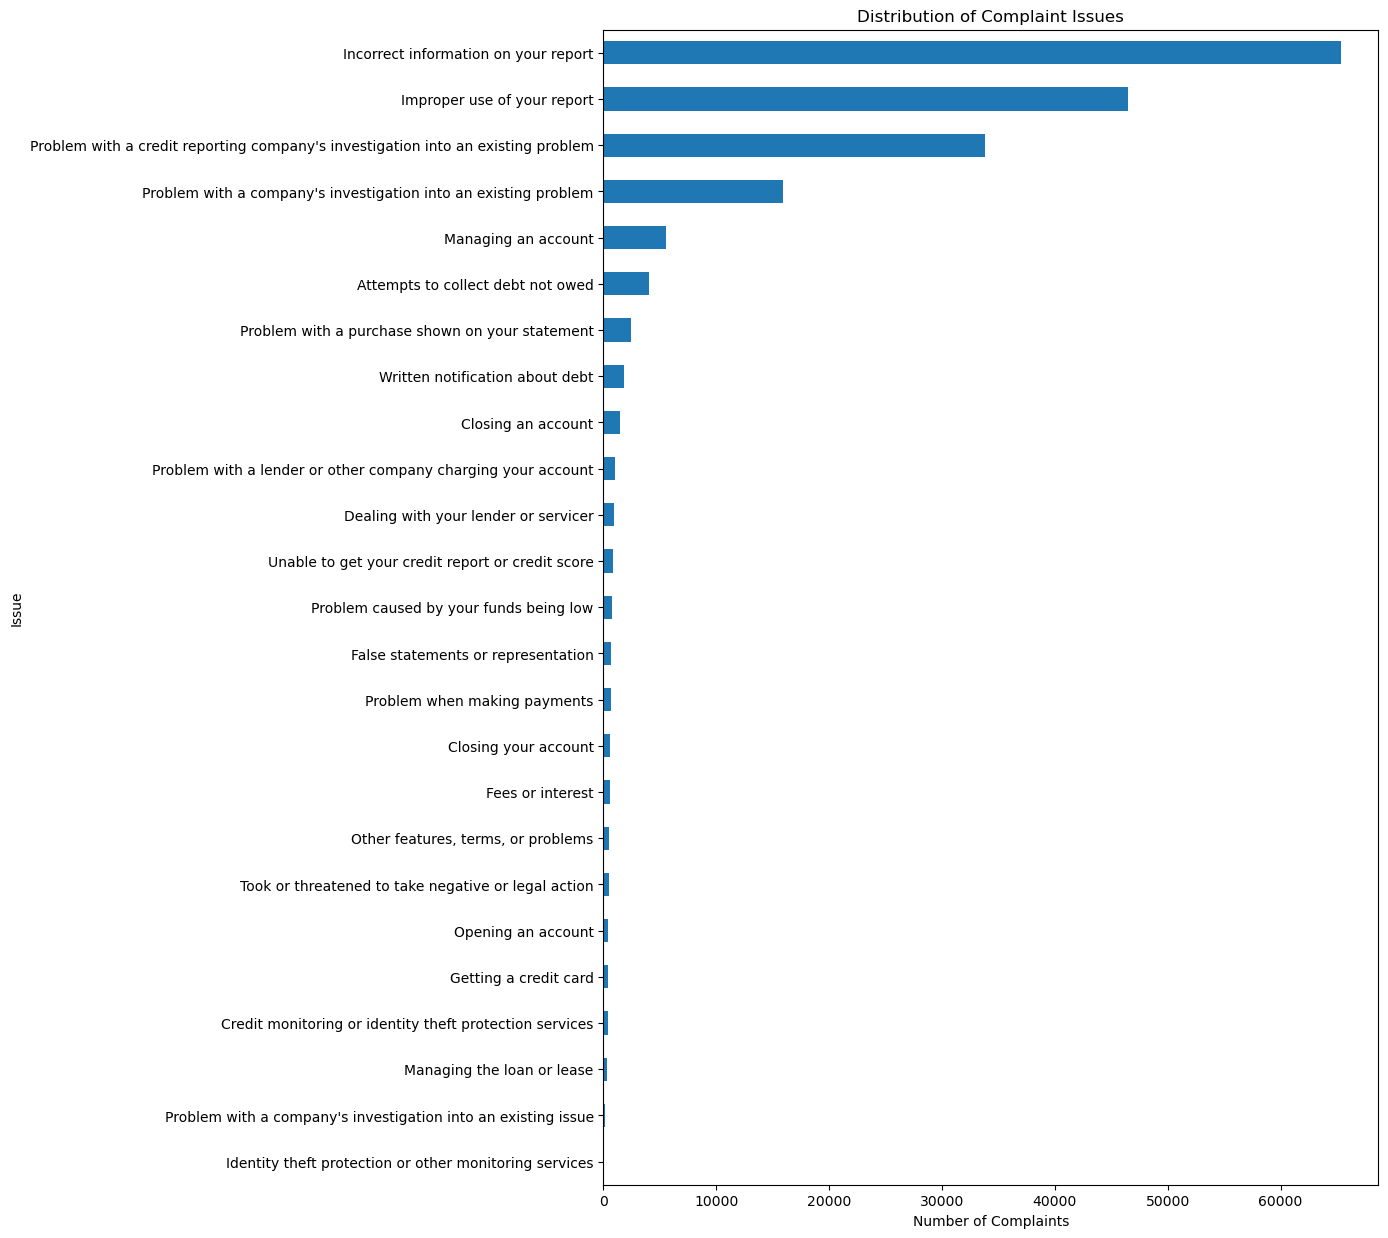

In [38]:
issue_counts = df['Issue'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 15))
issue_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.title('Distribution of Complaint Issues')
plt.show()

In [148]:
issue_mapping = {
    # Payment Issues
    'Struggling to pay mortgage': 'Payment Issues',
    'Fees or interest': 'Payment Issues',
    'Trouble during payment process': 'Payment Issues',
    'Problem when making payments': 'Payment Issues',
    'Struggling to pay your loan': 'Payment Issues',
    'Struggling to pay your bill': 'Payment Issues',
    'Struggling to repay your loan': 'Payment Issues',
    'Problem caused by your funds being low': 'Payment Issues',
    
    

    # Account Management
    'Managing an account': 'Account Management',
    'Closing an account': 'Account Management',
    'Opening an account': 'Account Management',
    'Closing your account': 'Account Management',
    'Problem getting a card or closing an account': 'Account Management',
    

    # Credit Card/Loan Issues
    'Problem with a lender or other company charging your account': 'Loan Issues',
    'Managing the loan or lease': 'Loan Issues',  # New subcategory
    'Dealing with your lender or servicer': 'Loan Issues',  # New subcategory
    'Getting a credit card': 'Credit Card Issues',  # New subcategory
    'Unable to get your credit report or credit score': 'Credit Card Issues',
    'Applying for a mortgage or refinancing an existing mortgage': 'Loan Issues',  # New subcategory
    'Getting a loan or lease': 'Loan Issues',
    'Getting a loan': 'Loan Issues',
    'Issue with income share agreement': 'Loan Issues',
    'Issue where my lender is my school': 'Loan Issues',
    'Repossession': 'Loan Issues',  
    'Problems at the end of the loan or lease': 'Loan Issues',
    'Closing on a mortgage': 'Loan Issues',


    
    'Identity theft protection or other monitoring services': 'Other/General Issues',  # Reassigned to Other/General Issues

    # Credit Reporting - Investigation Issues
    'Problem with a credit reporting company\'s investigation into an existing problem': 'Credit Reporting - Investigation Issues',

    ## On-going Investigation Issues
    'Problem with a company\'s investigation into an existing issue': 'On-going Investigation Issues',
    'Problem with a company\'s investigation into an existing problem': 'On-going Investigation Issues',  # Added missing category

    # Credit Reporting - General Issues
    'Improper use of your report': 'Credit Reporting - Identity Theft',
    'False statements or representation': 'Credit Reporting - Identity Theft',
    'Electronic communications': 'Credit Reporting - Identity Theft',
    'Incorrect information on your report': 'Credit Reporting - General Issues',
    

    # Purchase/Transaction Issues
    'Problem with a purchase shown on your statement': 'Purchase/Transaction Issues',
    'Problem with a purchase or transfer': 'Purchase/Transaction Issues',

    # Customer Service/Investigation Issues
    'Written notification about debt': 'Customer Service/Investigation Issues',
    'Communication tactics': 'Customer Service/Investigation Issues',

    # Advertisement Issues
    'Advertising': 'Advertisement Issues',
    'Advertising and marketing, including promotional offers': 'Advertisement Issues',

    # Legal/Threatening Actions
    'Attempts to collect debt not owed': 'Legal/Threatening Actions',
    'Took or threatened to take negative or legal action': 'Legal/Threatening Actions',
    'Threatened to contact someone or share information improperly': 'Legal/Threatening Actions',

    # Other/General Issues
    'Other features, terms, or problems': 'Other/General Issues',
    'Other issues not categorized above': 'Other/General Issues',

 
    # Credit Card Usage Issues
    'Trouble using the card': 'Credit Card Issues',
    'Trouble using your card': 'Credit Card Issues',

    # Banking/Financial Product Issues
    'Credit monitoring or identity theft protection services': 'Banking/Financial Product Issues',
    'Problem with overdraft': 'Banking/Financial Product Issues',

    # Customer Service/Investigation Issues (Clubbed with Other/General Issues)
    'Customer Service/Investigation Issues': 'Other/General Issues'
}

In [149]:
df['Issue_Category'] = df['Issue'].map(issue_mapping)

In [150]:
df['Issue_Category'].fillna('Other/General Issues', inplace=True)

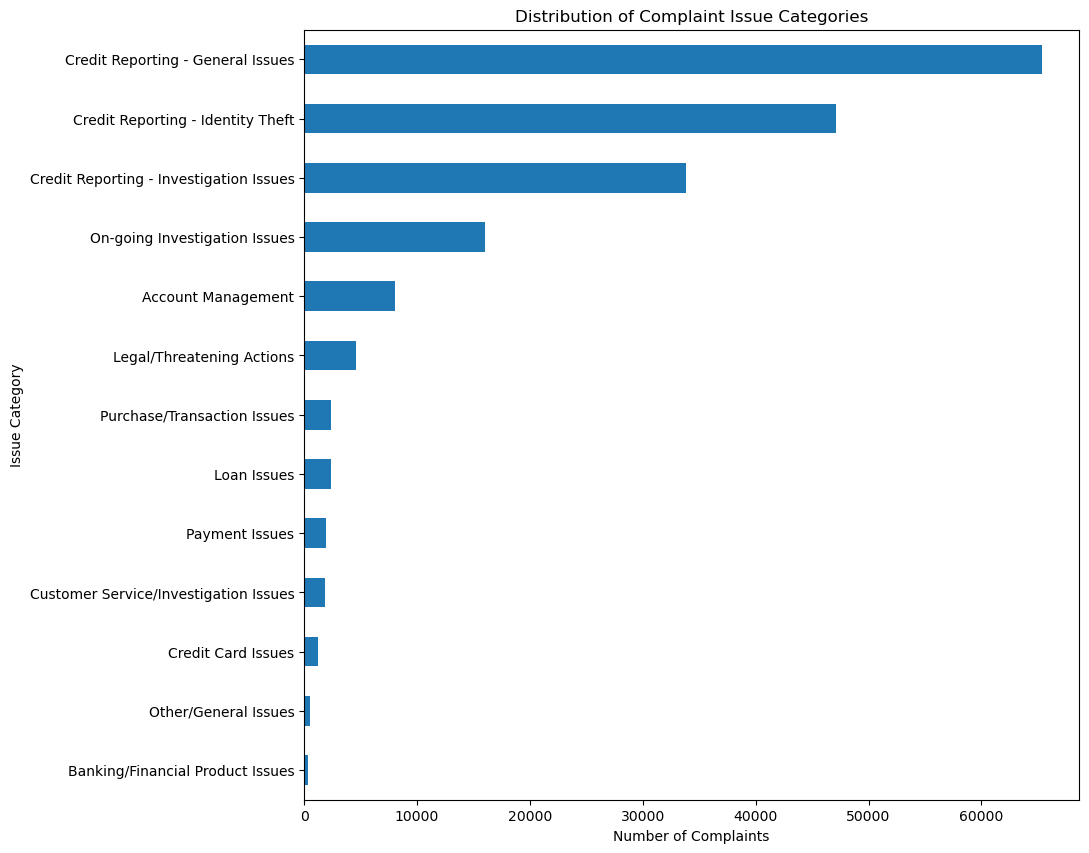

In [151]:
category_counts = df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [156]:
issue_mapping = {
    # Payment Issues
    'Struggling to pay mortgage': 'Payment Difficulties',
    'Fees or interest': 'Payment Difficulties',
    'Trouble during payment process': 'Payment Difficulties',
    'Problem when making payments': 'Payment Difficulties',
    'Struggling to pay your loan': 'Payment Difficulties',
    'Struggling to pay your bill': 'Payment Difficulties',
    'Struggling to repay your loan': 'Payment Difficulties',
    'Problem caused by your funds being low': 'Payment Difficulties',

    # Account Management
    'Managing an account': 'Account Management',
    'Closing an account': 'Account Management',
    'Opening an account': 'Account Management',
    'Closing your account': 'Account Management',
    'Problem getting a card or closing an account': 'Account Management',

    # Loan Issues
    'Problem with a lender or other company charging your account': 'Loan Management',
    'Managing the loan or lease': 'Loan Management',
    'Dealing with your lender or servicer': 'Loan Management',
    'Applying for a mortgage or refinancing an existing mortgage': 'Loan Management',
    'Getting a loan or lease': 'Loan Management',
    'Getting a loan': 'Loan Management',
    'Issue with income share agreement': 'Loan Management',
    'Issue where my lender is my school': 'Loan Management',
    'Repossession': 'Loan Management',
    'Problems at the end of the loan or lease': 'Loan Management',
    'Closing on a mortgage': 'Loan Management',

    # Credit Card Issues
    'Getting a credit card': 'Credit Card Management',
    'Unable to get your credit report or credit score': 'Credit Card Management',
    'Trouble using the card': 'Credit Card Management',
    'Trouble using your card': 'Credit Card Management',

    # Credit Reporting Issues
    'Problem with a credit reporting company\'s investigation into an existing problem': 'Credit Reporting Investigation',
    'Improper use of your report': 'Other Issues',
    'False statements or representation': 'Legal Issues',
    'Electronic communications': 'Credit Reporting',
    'Incorrect information on your report': 'Banking and Financial Products',

    # Transaction Issues
    'Problem with a purchase shown on your statement': 'Transaction Issues',
    'Problem with a purchase or transfer': 'Transaction Issues',

    # Customer Service Issues
    'Written notification about debt': 'Customer Service',
    'Communication tactics': 'Customer Service',

    # Advertisement Issues
    'Advertising': 'Advertisement Issues',
    'Advertising and marketing, including promotional offers': 'Advertisement Issues',

    # Legal Issues
    'Attempts to collect debt not owed': 'Legal Issues',
    'Took or threatened to take negative or legal action': 'Legal Issues',
    'Threatened to contact someone or share information improperly': 'Legal Issues',

    # Banking/Financial Product Issues
    'Credit monitoring or identity theft protection services': 'Banking and Financial Products',
    'Problem with overdraft': 'Banking and Financial Products',

    # Other/General Issues
    'Other features, terms, or problems': 'Other Issues',
    'Other issues not categorized above': 'Other Issues',
    'Identity theft protection or other monitoring services': 'Other Issues',
    'Problem with a company\'s investigation into an existing issue': 'Other Issues',
    'Problem with a company\'s investigation into an existing problem': 'Other Issues',
}


In [157]:
df['Issue_Category'] = df['Issue'].map(issue_mapping)

In [158]:
df['Issue_Category'].fillna('Other/General Issues', inplace=True)

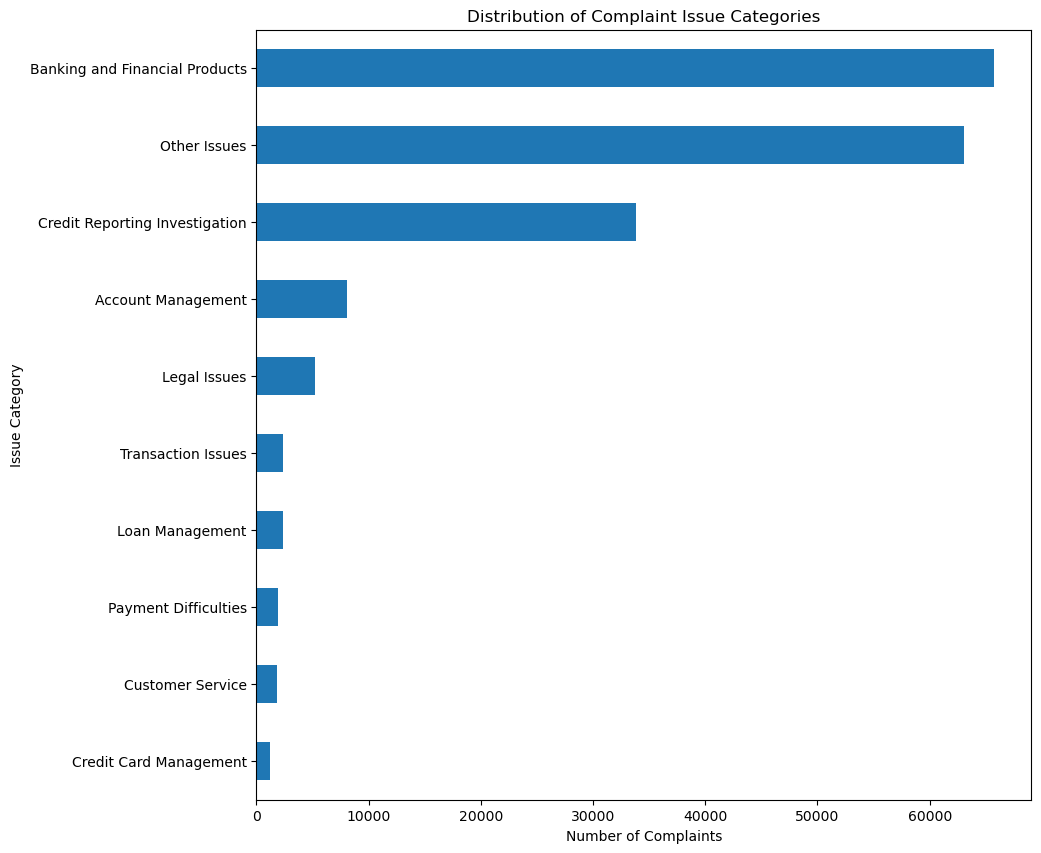

In [159]:
category_counts = df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [160]:
### 2022 data

In [161]:
df_2022['Issue_Category'] = df_2022['Issue'].map(issue_mapping)

In [162]:
df_2022['Issue_Category'].fillna('Other/General Issues', inplace=True)

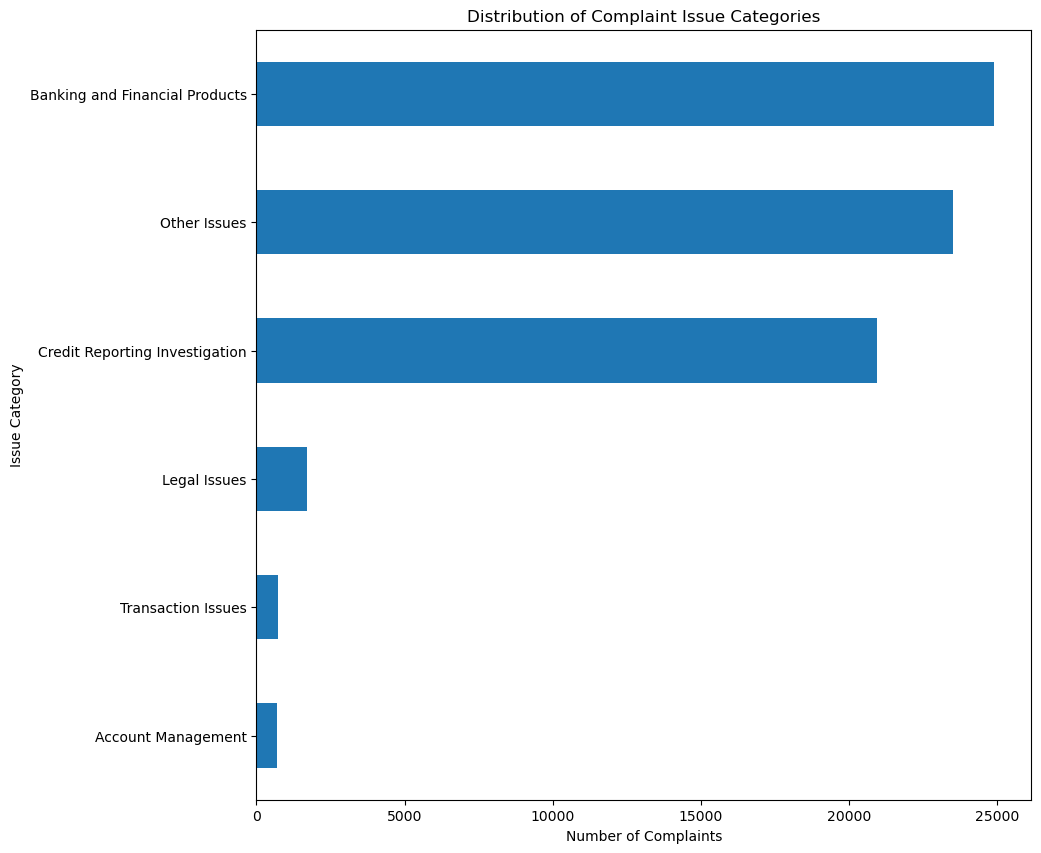

In [163]:
category_counts = df_2022['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [164]:
df_counts =df['Issue_Category'].value_counts()
df_counts

Issue_Category
Banking and Financial Products    65773
Other Issues                      63030
Credit Reporting Investigation    33849
Account Management                 8043
Legal Issues                       5209
Transaction Issues                 2412
Loan Management                    2335
Payment Difficulties               1950
Customer Service                   1826
Credit Card Management             1210
Name: count, dtype: int64

In [165]:
df_2022_counts = df_2022['Issue_Category'].value_counts()
df_2022_counts

Issue_Category
Banking and Financial Products    24910
Other Issues                      23510
Credit Reporting Investigation    20930
Legal Issues                       1701
Transaction Issues                  725
Account Management                  700
Name: count, dtype: int64

In [ ]:
required_additions = max_count - df_counts
required_additions = required_additions[required_additions > 0]
required_additions

In [ ]:
import pandas as pd

# Load your datasets (assuming you have replaced these placeholders with your actual file paths)
# df = pd.read_csv('path_to_your_first_dataset.csv')
# df_2022 = pd.read_csv('path_to_your_second_dataset.csv')

# Calculate the counts of each category in both datasets
df_counts = df['Issue_Category'].value_counts()
df_2022_counts = df_2022['Issue_Category'].value_counts()

# Find the maximum count in the first dataset to know how many entries we aim for each category
# Ignoring Credit Reporting category since it's already the largest
max_count = df_counts.drop(labels=['Credit Reporting - General Issues', 
                                   'Credit Reporting - Investigation Issues',
                                   'Credit Reporting - Identity Theft']).max()

# Determine the required additions for each category in the first dataset
required_additions = max_count - df_counts
required_additions = required_additions[required_additions > 0]

# Create a list to hold dataframes that need to be concatenated
dfs_to_concat = [df]

# For categories in required_additions, add data from df_2022
for category, required_count in required_additions.items():
    # Check if the category exists in the second dataset and if it has enough entries
    if category in df_2022_counts.index and required_count > 0:
        # Select the required number of entries from the second dataset
        additional_data = df_2022[df_2022['Issue_Category'] == category].head(int(required_count))
        # Add the additional data to the list
        dfs_to_concat.append(additional_data)

# Concatenate all the dataframes in the list to create a balanced dataframe
balanced_df = pd.concat(dfs_to_concat, ignore_index=True)

# Now balanced_df should be more balanced across categories, except for the Credit Reporting category
# Optionally save this new balanced dataset
# balanced_df.to_csv('balanced_dataset.csv', index=False)


In [167]:
balanced_df_counts = balanced_df['Issue_Category'].value_counts()
balanced_df_counts

Issue_Category
Credit Reporting - General Issues          65393
Credit Reporting - Identity Theft          47093
Credit Reporting - Investigation Issues    33849
On-going Investigation Issues              16038
Account Management                          8743
Legal/Threatening Actions                   6251
Purchase/Transaction Issues                 3137
Loan Issues                                 2335
Payment Issues                              1950
Customer Service/Investigation Issues       1826
Credit Card Issues                          1210
Other/General Issues                         558
Banking/Financial Product Issues             380
Name: count, dtype: int64

In [168]:
required_additions = max_count - df_counts
required_additions = required_additions[required_additions > 0]
required_additions

Issue_Category
Account Management         7995
Legal Issues              10829
Transaction Issues        13626
Loan Management           13703
Payment Difficulties      14088
Customer Service          14212
Credit Card Management    14828
Name: count, dtype: int64

In [169]:
dataframes_for_concat = [df]


In [170]:
for category, additional_needed in required_additions.items():
    if category in df_2022['Issue_Category'].values:
        # Find the records in df_2022 that match the category
        category_records = df_2022[df_2022['Issue_Category'] == category]
        
        # If df_2022 has more records than needed, take only as much as needed
        if len(category_records) > additional_needed:
            category_records = category_records.head(additional_needed)
        
        # Add these records to the list for concatenation
        dataframes_for_concat.append(category_records)

In [171]:
balanced_df = pd.concat(dataframes_for_concat, ignore_index=True)

In [172]:
balanced_df_counts = balanced_df['Issue_Category'].value_counts()

In [173]:
balanced_df_counts

Issue_Category
Banking and Financial Products    65773
Other Issues                      63030
Credit Reporting Investigation    33849
Account Management                 8743
Legal Issues                       6910
Transaction Issues                 3137
Loan Management                    2335
Payment Difficulties               1950
Customer Service                   1826
Credit Card Management             1210
Name: count, dtype: int64

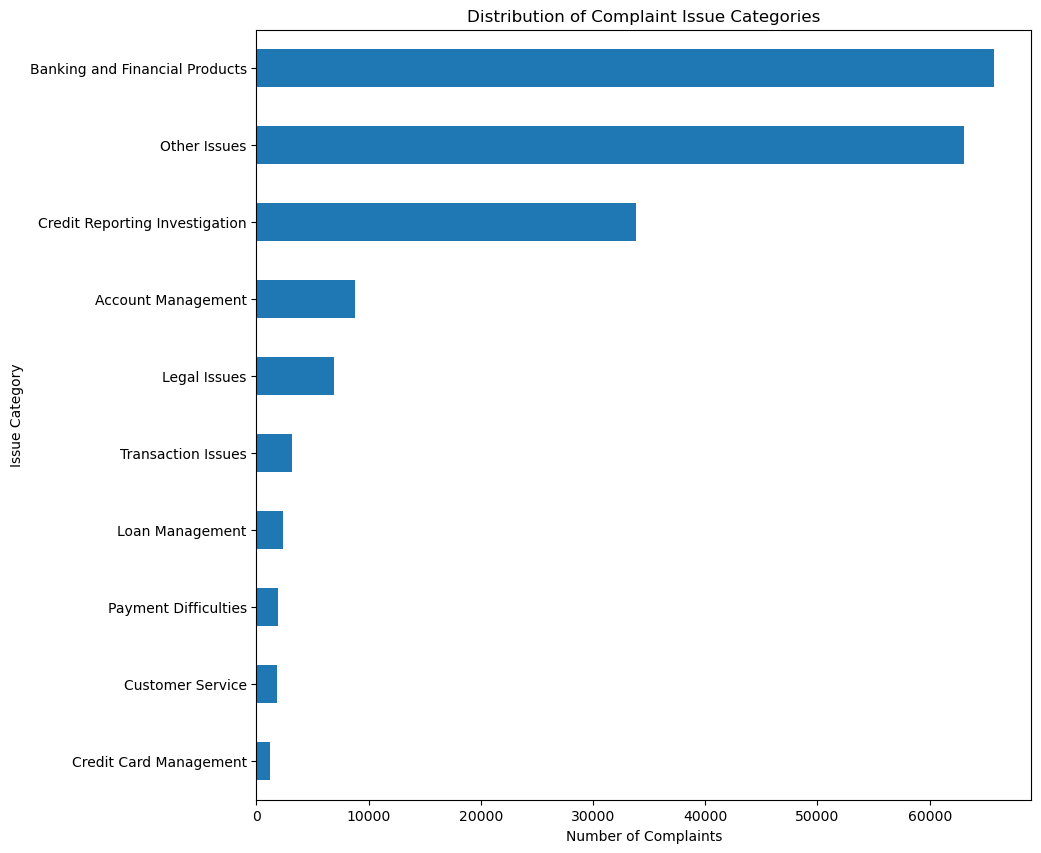

In [174]:
category_counts = balanced_df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
category_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Distribution of Complaint Issue Categories')
plt.show()

In [119]:
for category, required_count in required_additions.items():
    if category in df_2022_counts and df_2022_counts[category] >= required_count:
        additional_data = df_2022[df_2022['Issue_Category'] == category].head(required_count)
        df = df.append(additional_data, ignore_index=True)

In [120]:
df_counts =df['Issue_Category'].value_counts()
df_counts

Issue_Category
Credit Reporting - General Issues          65393
Credit Reporting - Identity Theft          47093
Credit Reporting - Investigation Issues    33849
On-going Investigation Issues              16038
Account Management                          8043
Legal/Threatening Actions                   4550
Purchase/Transaction Issues                 2412
Loan Issues                                 2335
Payment Issues                              1950
Customer Service/Investigation Issues       1826
Credit Card Issues                          1210
Other/General Issues                         558
Banking/Financial Product Issues             380
Name: count, dtype: int64

In [83]:
from collections import defaultdict

# Invert the issue_mapping dictionary
category_to_sub_issues = defaultdict(set)
for sub_issue, category in issue_mapping.items():
    category_to_sub_issues[category].add(sub_issue)

# Convert the defaultdict to a regular dict
category_to_sub_issues = dict(category_to_sub_issues)

# Print the mapping of categories to sub-issues
for category, sub_issues in category_to_sub_issues.items():
    print(f"{category}: {sub_issues}")


Payment Issues: {'Trouble during payment process', 'Fees or interest', 'Problem when making payments', 'Problem caused by your funds being low', 'Struggling to pay your bill', 'Struggling to repay your loan', 'Struggling to pay your loan', 'Struggling to pay mortgage'}
Account Management: {'Opening an account', 'Closing your account', 'Managing an account', 'Problem getting a card or closing an account', 'Closing an account'}
Loan Issues: {'Getting a loan or lease', 'Repossession', 'Managing the loan or lease', 'Problems at the end of the loan or lease', 'Applying for a mortgage or refinancing an existing mortgage', 'Problem with a lender or other company charging your account', 'Closing on a mortgage', 'Dealing with your lender or servicer', 'Issue with income share agreement', 'Getting a loan', 'Issue where my lender is my school'}
Credit Card Issues: {'Trouble using the card', 'Trouble using your card', 'Unable to get your credit report or credit score', 'Getting a credit card'}
Oth

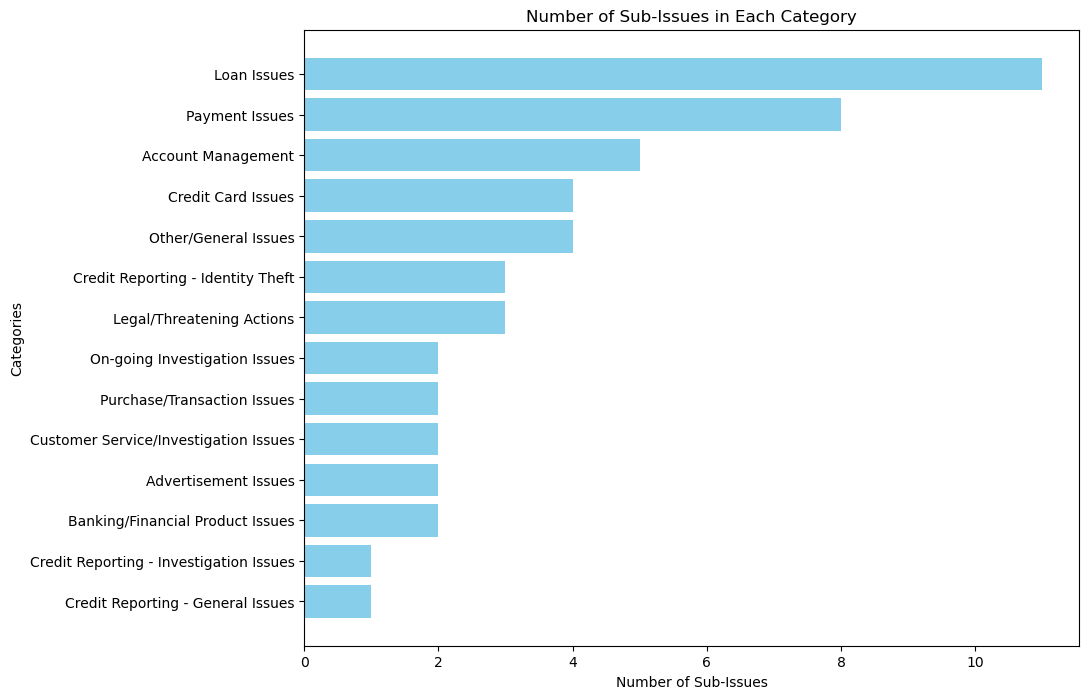

In [84]:
import matplotlib.pyplot as plt

# Count the number of sub-issues in each category
category_counts = {category: len(sub_issues) for category, sub_issues in category_to_sub_issues.items()}

# Sort the categories by the number of sub-issues
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Unpack the sorted categories and their counts
categories, counts = zip(*sorted_categories)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Number of Sub-Issues')
plt.ylabel('Categories')
plt.title('Number of Sub-Issues in Each Category')
plt.gca().invert_yaxis()  # Invert the y-axis to have the category with the most sub-issues at the top
plt.show()


In [85]:
# Extract sub-issues for 'Loan Issues'
loan_issues_sub_issues = [sub_issue for sub_issue, category in issue_mapping.items() if category == 'Loan Issues']

# Print out the sub-issues
print("Sub-issues under 'Loan Issues':")
for sub_issue in loan_issues_sub_issues:
    print(f"- {sub_issue}")


Sub-issues under 'Loan Issues':
- Problem with a lender or other company charging your account
- Managing the loan or lease
- Dealing with your lender or servicer
- Applying for a mortgage or refinancing an existing mortgage
- Getting a loan or lease
- Getting a loan
- Issue with income share agreement
- Issue where my lender is my school
- Repossession
- Problems at the end of the loan or lease
- Closing on a mortgage


In [86]:
# Assuming 'df' is your dataframe and 'Issue' is the column with sub-issues
loan_issues_count = df[df['Issue'].isin(loan_issues_sub_issues)]['Issue'].value_counts()

# Print out the counts for each sub-issue under 'Loan Issues'
print("Counts of sub-issues under 'Loan Issues':")
print(loan_issues_count)


Counts of sub-issues under 'Loan Issues':
Issue
Problem with a lender or other company charging your account    1014
Dealing with your lender or servicer                             979
Managing the loan or lease                                       342
Name: count, dtype: int64


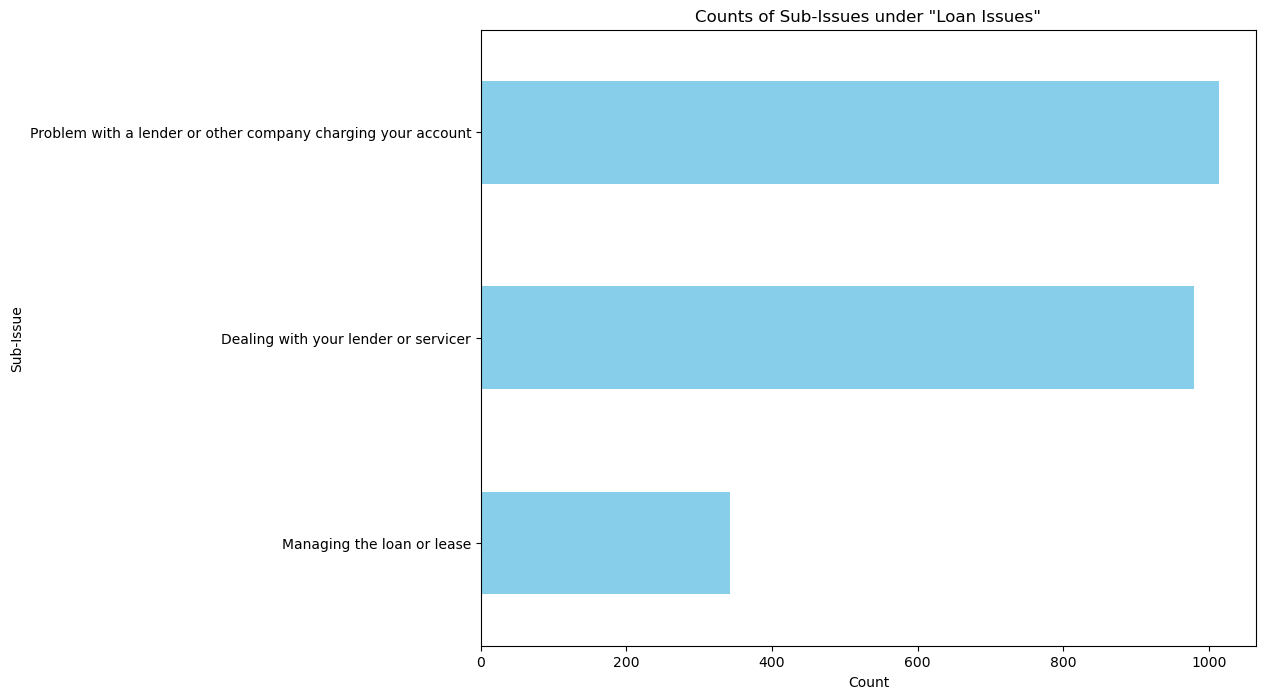

In [87]:
loan_issues_count_sorted = loan_issues_count.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
loan_issues_count_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sub-Issue')
plt.title('Counts of Sub-Issues under "Loan Issues"')
plt.show()

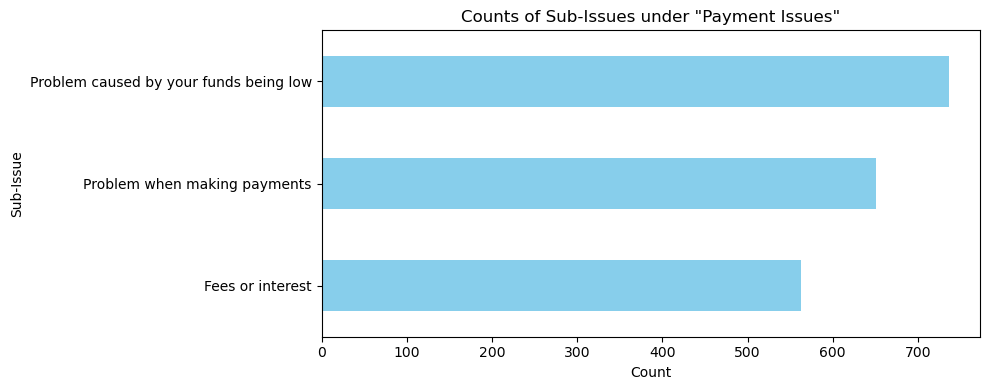

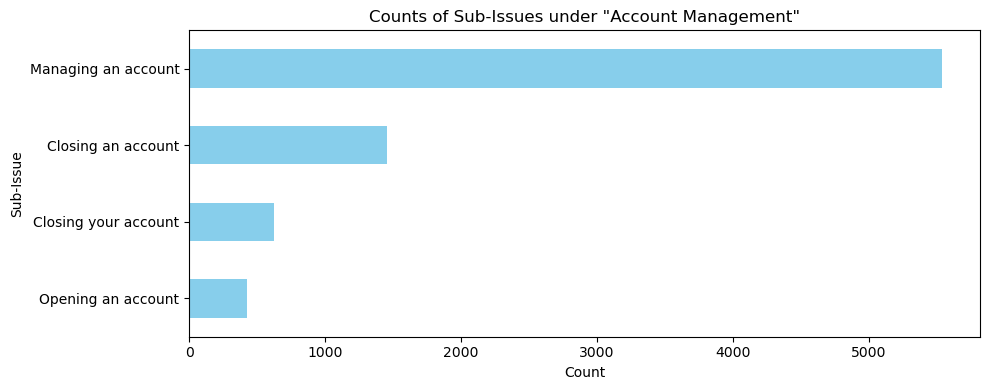

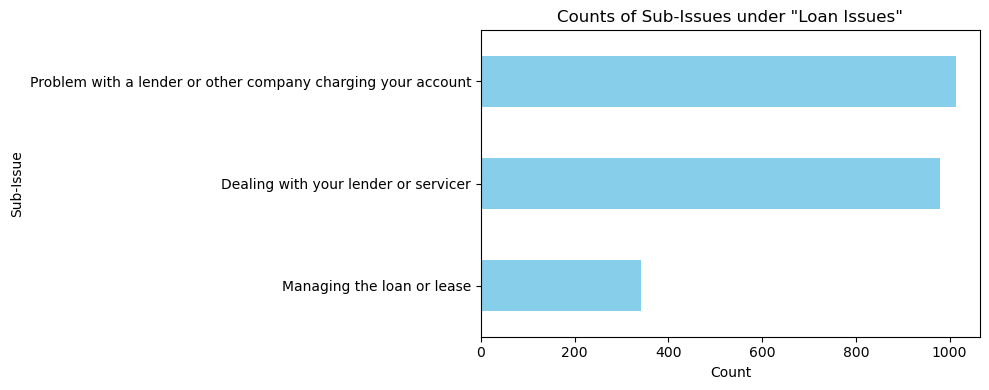

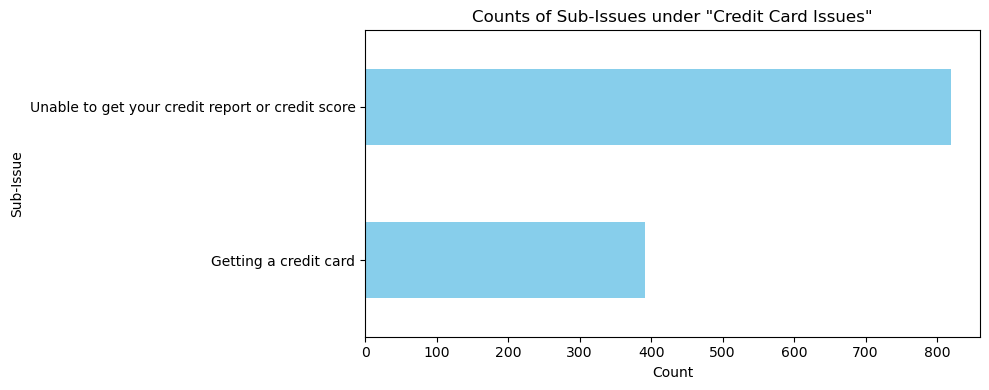

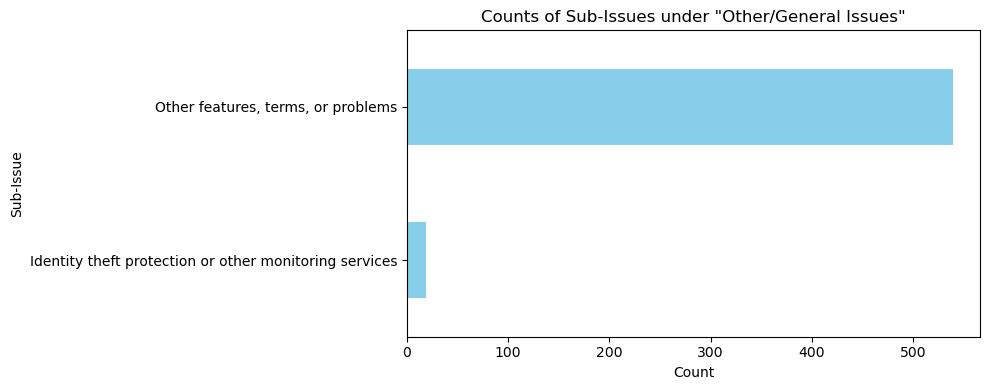

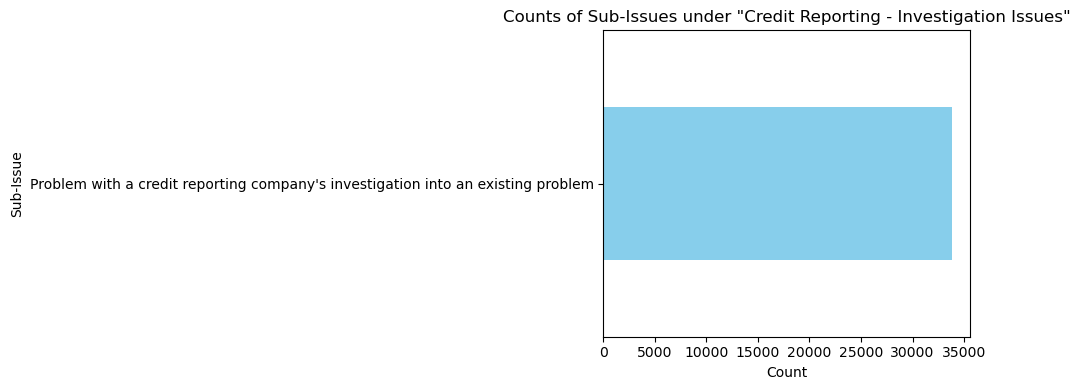

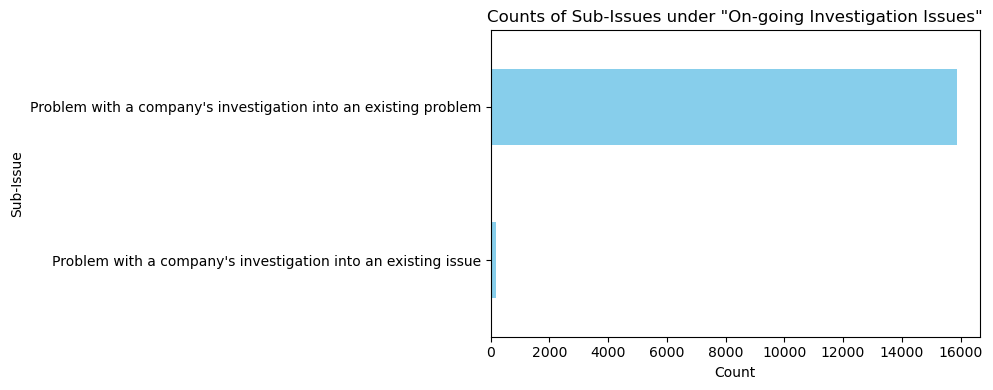

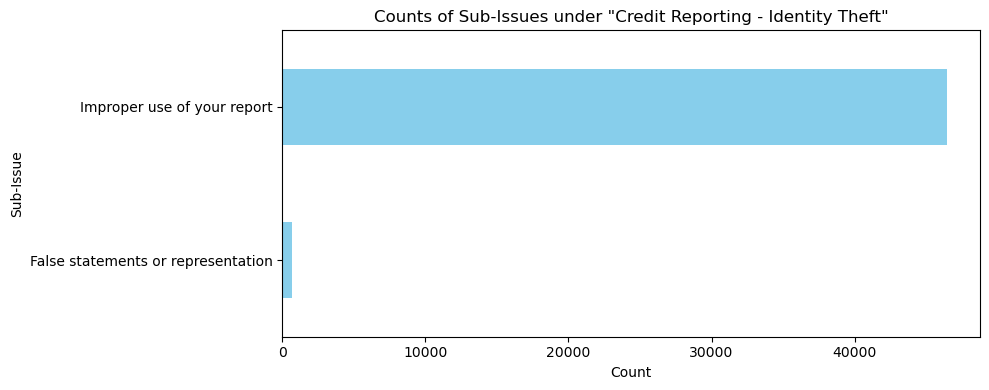

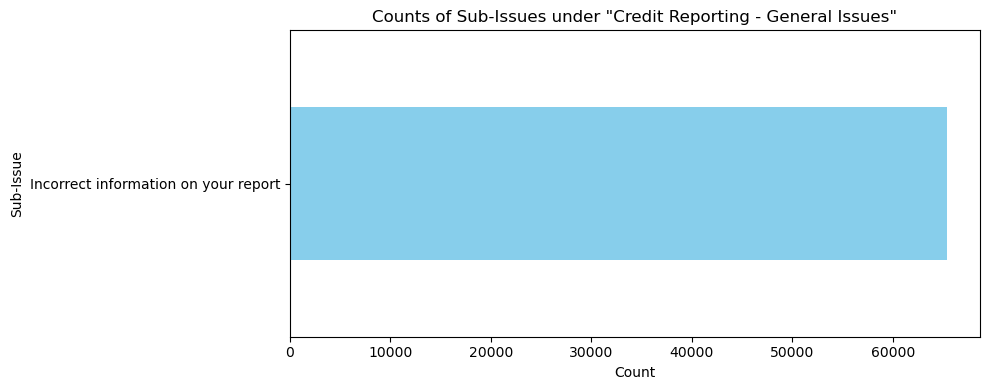

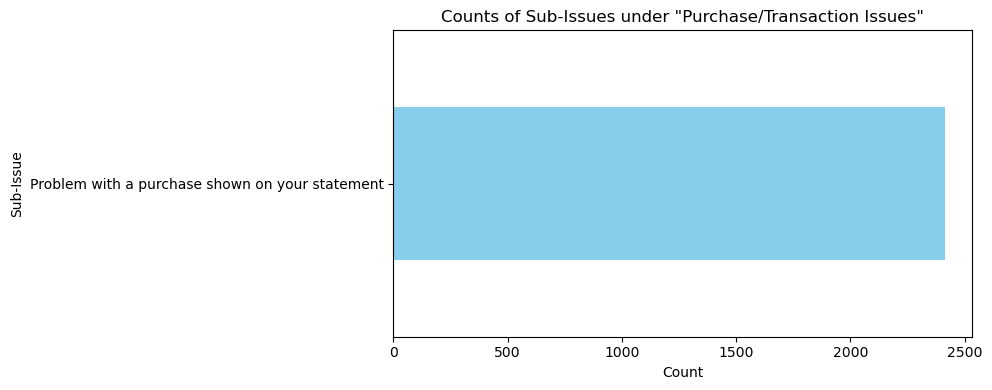

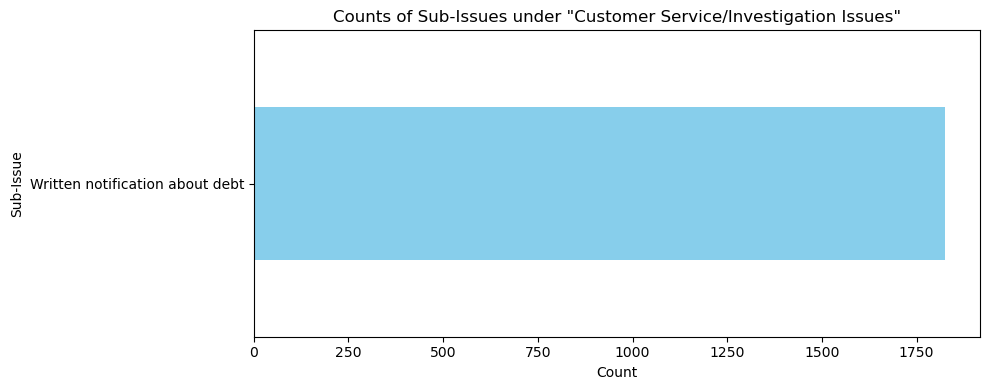

No data to plot for category: Advertisement Issues


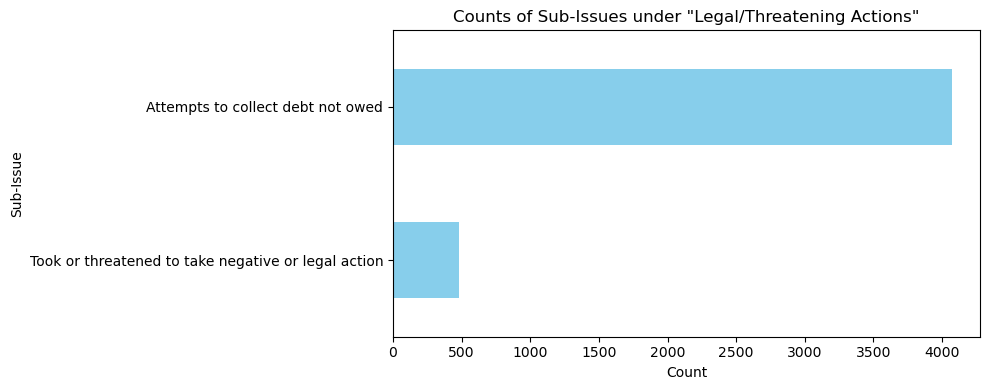

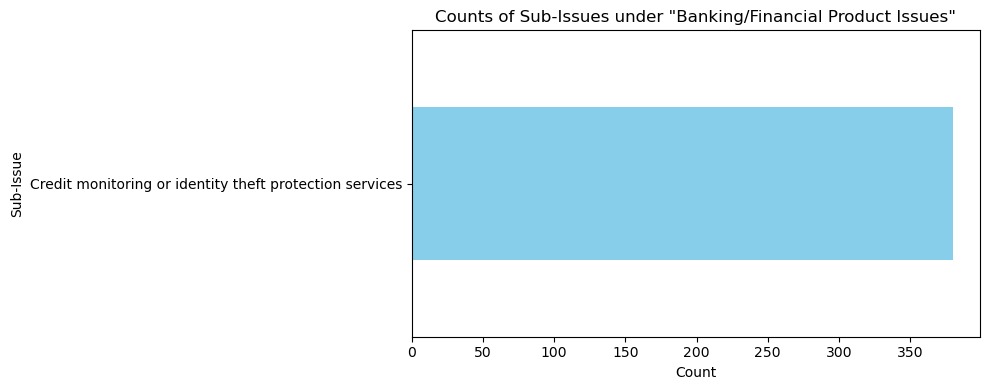

In [89]:
import matplotlib.pyplot as plt

# Loop through each category and its sub-issues
for category, sub_issues in category_to_sub_issues.items():
    # Filter the dataframe for only the sub-issues in the current category
    sub_issues_data = df[df['Issue'].isin(sub_issues)]
    
    # Check if there are any sub-issues to plot
    if not sub_issues_data.empty:
        # Get the count of each sub-issue within the category
        sub_issue_counts = sub_issues_data['Issue'].value_counts()
        
        # Sort the counts in descending order for better visualization
        sub_issue_counts_sorted = sub_issue_counts.sort_values(ascending=True)
        
        # Create a horizontal bar plot for the current category
        plt.figure(figsize=(10, max(4, len(sub_issue_counts) * 0.5)))  # Adjust the figure size based on the number of sub-issues
        sub_issue_counts_sorted.plot(kind='barh', color='skyblue')
        plt.xlabel('Count')
        plt.ylabel('Sub-Issue')
        plt.title(f'Counts of Sub-Issues under "{category}"')
        
        # Show the plot
        plt.tight_layout()  # Adjust layout to fit all labels
        plt.show()
    else:
        print(f"No data to plot for category: {category}")


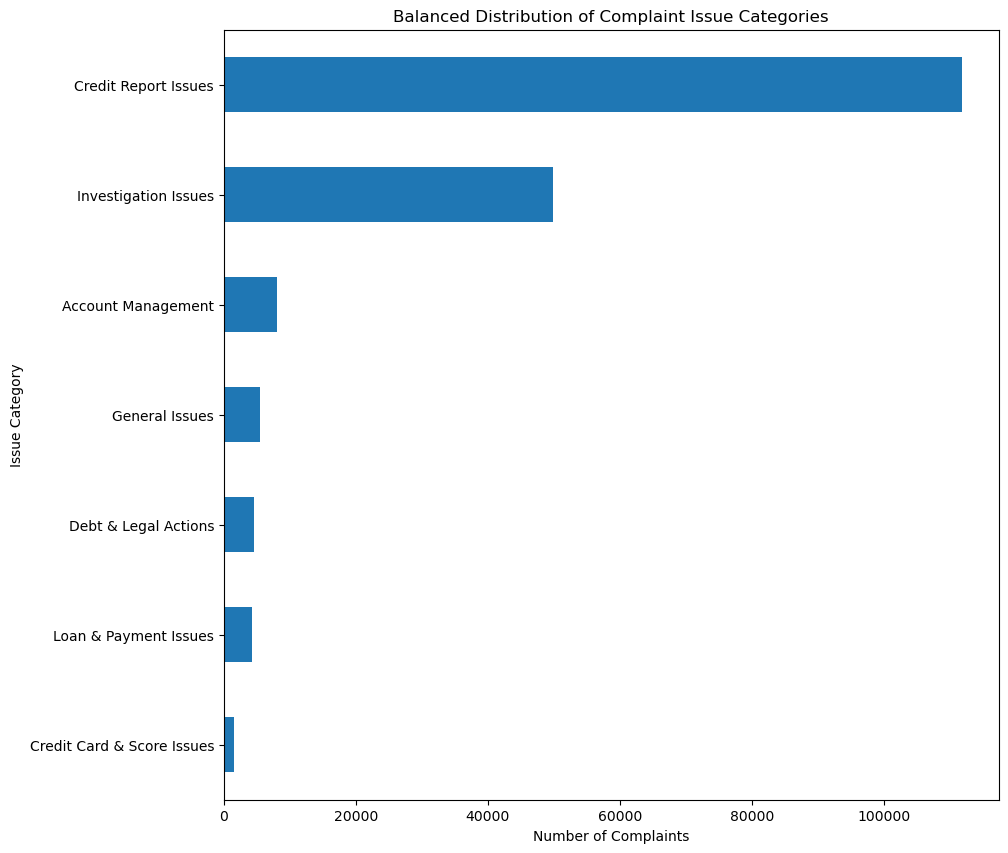

In [43]:
issue_mapping = {
    'Incorrect information on your report': 'Credit Report Issues',
    'Improper use of your report': 'Credit Report Issues',
    'Problem with a credit reporting company\'s investigation into an existing problem': 'Investigation Issues',
    'Problem with a company\'s investigation into an existing problem': 'Investigation Issues',
    'Problem with a company\'s investigation into an existing issue': 'Investigation Issues',
    'Managing an account': 'Account Management',
    'Closing an account': 'Account Management',
    'Opening an account': 'Account Management',
    'Closing your account': 'Account Management',
    'Problem with a lender or other company charging your account': 'Loan & Payment Issues',
    'Dealing with your lender or servicer': 'Loan & Payment Issues',
    'Managing the loan or lease': 'Loan & Payment Issues',
    'Problem caused by your funds being low': 'Loan & Payment Issues',
    'Problem when making payments': 'Loan & Payment Issues',
    'Fees or interest': 'Loan & Payment Issues',
    'Attempts to collect debt not owed': 'Debt & Legal Actions',
    'Took or threatened to take negative or legal action': 'Debt & Legal Actions',
    'Unable to get your credit report or credit score': 'Credit Card & Score Issues',
    'Getting a credit card': 'Credit Card & Score Issues',
    'Credit monitoring or identity theft protection services': 'Credit Card & Score Issues',
    'Identity theft protection or other monitoring services': 'Credit Card & Score Issues',
    'Problem with a purchase shown on your statement': 'General Issues',
    'Written notification about debt': 'General Issues',
    'False statements or representation': 'General Issues',
    'Other features, terms, or problems': 'General Issues',
}


df['Issue_Category'] = df['Issue'].map(issue_mapping)

df['Issue_Category'].fillna('Other/General Issues', inplace=True)

balanced_counts = df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
balanced_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Balanced Distribution of Complaint Issue Categories')
#plt.tight_layout()
plt.show()


In [44]:
df['Issue'].value_counts()

Issue
Incorrect information on your report                                                65393
Improper use of your report                                                         46434
Problem with a credit reporting company's investigation into an existing problem    33849
Problem with a company's investigation into an existing problem                     15868
Managing an account                                                                  5541
Attempts to collect debt not owed                                                    4072
Problem with a purchase shown on your statement                                      2412
Written notification about debt                                                      1826
Closing an account                                                                   1454
Problem with a lender or other company charging your account                         1014
Dealing with your lender or servicer                                                  979
Unab

In [92]:
data_2023_2022 = pd.read_csv('/Users/sharanyasenthil/Downloads/data_august22_august23.csv')

In [93]:
data_2023_2022['Date received'] = pd.to_datetime(data_2023_2022['Date received'])

cols_to_consider = ['Product','Sub-product','Issue','Sub-issue','Consumer complaint narrative','Company public response','Company',
                    'State', 'ZIP code', 'Date received']
df_new = data_2023_2022[cols_to_consider]

df_new = df_new.dropna()

/var/folders/rc/bl7kjxsx35q356jw556y5vmc0000gn/T/ipykernel_26277/4074241945.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2023_2022['Date received'] = pd.to_datetime(data_2023_2022['Date received'])


In [94]:
df_2022 = df_new[df_new['Date received'].dt.year.isin([2022])].reset_index(drop=True)

product_map = {'Credit reporting or other personal consumer reports' : 'Credit Reporting',
               'Credit reporting, credit repair services, or other personal consumer reports' : 'Credit Reporting',
               'Payday loan, title loan, personal loan, or advance loan' : 'Loans / Mortgage',
               'Payday loan, title loan, or personal loan' : 'Loans / Mortgage',
               'Student loan' : 'Loans / Mortgage',
               'Vehicle loan or lease' : 'Loans / Mortgage',
               'Debt collection' : 'Debt collection',
               'Credit card or prepaid card' : 'Credit/Prepaid Card',
               'Credit card' : 'Credit/Prepaid Card',
               'Prepaid card' : 'Credit/Prepaid Card',
               'Mortgage' : 'Loans / Mortgage',
               'Checking or savings account' : 'Checking or savings account'  
              }

df_2022.loc[:,'Product'] = df_2022['Product'].map(product_map)

In [95]:
df_2022['complaint length'] = df_2022['Consumer complaint narrative'].apply(lambda x : len(x))

In [96]:
df_2022 = df_2022[df_2022['complaint length'] > 20]

complaints_to_exclude = ['See document attached', 'See the attached documents.', 'Incorrect information on my credit report', 'incorrect information on my credit report',
'please see attached file','Please see documents Attached','Incorrect information on my credit report.', 'Please see attached file', 'see attached',
'See attached', 'SEE ATTACHED DOCUMENTS', 'See Attached', 'SEE ATTACHMENT', 'SEE ATTACHMENTS', 
'XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX']

df_2022 = df_2022[~df_2022['Consumer complaint narrative'].isin(complaints_to_exclude)]

In [97]:
df_2022_subset = df_2022[['Consumer complaint narrative','Product','Sub-product','Issue','Sub-issue']]
df_2022_subset.shape

(85900, 5)

In [98]:
sub_issues_to_consider = df_2022_subset['Sub-issue'].value_counts()[df_2022_subset['Sub-issue'].value_counts() > 500].index

In [99]:
reduced_subissues = df_2022_subset[df_2022_subset['Sub-issue'].isin(sub_issues_to_consider)]

In [100]:
sub_products_to_consider = reduced_subissues['Sub-product'].value_counts()[reduced_subissues['Sub-product'].value_counts() > 100].index
final_df_2022 = reduced_subissues[reduced_subissues['Sub-product'].isin(sub_products_to_consider)]

In [101]:
print(f"Unique Product offerings: {final_df_2022['Product'].nunique()}")
print(f"Unique Sub-product offerings: {final_df_2022['Sub-product'].nunique()}")
print(f"Unique Issue offerings: {final_df_2022['Issue'].nunique()}")
print(f"Unique Sub-issue offerings: {final_df_2022['Sub-issue'].nunique()}")

Unique Product offerings: 4
Unique Sub-product offerings: 9
Unique Issue offerings: 7
Unique Sub-issue offerings: 15


In [102]:
final_df_2022.columns

Index(['Consumer complaint narrative', 'Product', 'Sub-product', 'Issue',
       'Sub-issue'],
      dtype='object')

In [103]:
df_2022 = final_df_2022.drop(['Product', 'Sub-product'], axis=1)

In [104]:
df_2022.head(10)

,Consumer complaint narrative,Issue,Sub-issue
0,Im resubmitting a complaint to you today to in...,Incorrect information on your report,Information belongs to someone else
1,On XX/XX/2022 I sent 3 letters to each credit ...,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
2,HI I AM SUBMITTING THIS WITHOUT ANY INFLUENCE ...,Incorrect information on your report,Information belongs to someone else
3,"When I reinvestigated my credit report, I real...",Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
5,"XXXX used AmSher collection service, to collec...",Attempts to collect debt not owed,Debt is not yours
6,"On XX/XX/XXXX, I received a phone call from Co...",Incorrect information on your report,Information belongs to someone else
7,My name XXXX XXXX this complaint is not made i...,Improper use of your report,Reporting company used your report improperly
8,"On XX/XX/XXXX, i went to Sams club to open up ...",Improper use of your report,Credit inquiries on your report that you don't...
9,Despite the multiple previous written requests...,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...
10,The unverified items indicated below continue ...,Incorrect information on your report,Information belongs to someone else


In [175]:
issue_mapping = {
    # Payment Issues
    'Struggling to pay mortgage': 'Payment Issues',
    'Problem caused by your funds being low': 'Payment Issues',
    'Fees or interest': 'Payment Issues',
    'Trouble during payment process': 'Payment Issues',
    'Problem when making payments': 'Payment Issues',
    'Struggling to repay your loan': 'Payment Issues',
    'Struggling to pay your bill': 'Payment Issues',
    'Struggling to pay your loan': 'Payment Issues',

    # Account Management
    'Managing an account': 'Account Management',
    'Closing an account': 'Account Management',
    'Opening an account': 'Account Management',
    'Closing your account': 'Account Management',
    'Problem getting a card or closing an account': 'Account Management',
    

    # Credit Card/Loan Issues
    'Problem with a lender or other company charging your account': 'Loan Issues',
    'Managing the loan or lease': 'Loan Issues',  # New subcategory
    'Dealing with your lender or servicer': 'Loan Issues',  # New subcategory
    'Getting a credit card': 'Credit Card Issues',  # New subcategory
    'Unable to get your credit report or credit score': 'Credit Card Issues',
    'Applying for a mortgage or refinancing an existing mortgage': 'Loan Issues',  # New subcategory
    'Getting a loan or lease': 'Loan Issues',
    'Getting a loan': 'Loan Issues',
    'Issue with income share agreement': 'Loan Issues',
    'Issue where my lender is my school': 'Loan Issues',
    'Repossession': 'Loan Issues',  
    'Problems at the end of the loan or lease': 'Loan Issues',
    'Closing on a mortgage': 'Loan Issues',


    
    'Identity theft protection or other monitoring services': 'Other/General Issues',  # Reassigned to Other/General Issues

    # Credit Reporting - Investigation Issues
    'Problem with a credit reporting company\'s investigation into an existing problem': 'Credit Reporting - Investigation Issues',
    'Problem with a company\'s investigation into an existing issue': 'Credit Reporting - Investigation Issues',
    'Problem with a company\'s investigation into an existing problem': 'Credit Reporting - Investigation Issues',  # Added missing category

    # Credit Reporting - General Issues
    'Improper use of your report': 'Credit Reporting - Identity Theft',
    'False statements or representation': 'Credit Reporting - Identity Theft',
    'Electronic communications': 'Credit Reporting - Identity Theft',
    'Incorrect information on your report': 'Credit Reporting - General Issues',
    

    # Purchase/Transaction Issues
    'Problem with a purchase shown on your statement': 'Purchase/Transaction Issues',
    'Problem with a purchase or transfer': 'Purchase/Transaction Issues',

    # Customer Service/Investigation Issues
    'Written notification about debt': 'Customer Service/Investigation Issues',
    'Communication tactics': 'Customer Service/Investigation Issues',
    'Advertising': 'Customer Service/Investigation Issues',
    'Advertising and marketing, including promotional offers': 'Customer Service/Investigation Issues',

    # Legal/Threatening Actions
    'Attempts to collect debt not owed': 'Legal/Threatening Actions',
    'Took or threatened to take negative or legal action': 'Legal/Threatening Actions',
    'Threatened to contact someone or share information improperly': 'Legal/Threatening Actions',

    # Other/General Issues
    'Other features, terms, or problems': 'Other/General Issues',
    'Other issues not categorized above': 'Other/General Issues',

 
    # Credit Card Usage Issues
    'Trouble using the card': 'Credit Card Issues',
    'Trouble using your card': 'Credit Card Issues',

    # Banking/Financial Product Issues
    'Credit monitoring or identity theft protection services': 'Banking/Financial Product Issues',
    'Problem with overdraft': 'Banking/Financial Product Issues',

    # Customer Service/Investigation Issues (Clubbed with Other/General Issues)
    'Customer Service/Investigation Issues': 'Other/General Issues'
}

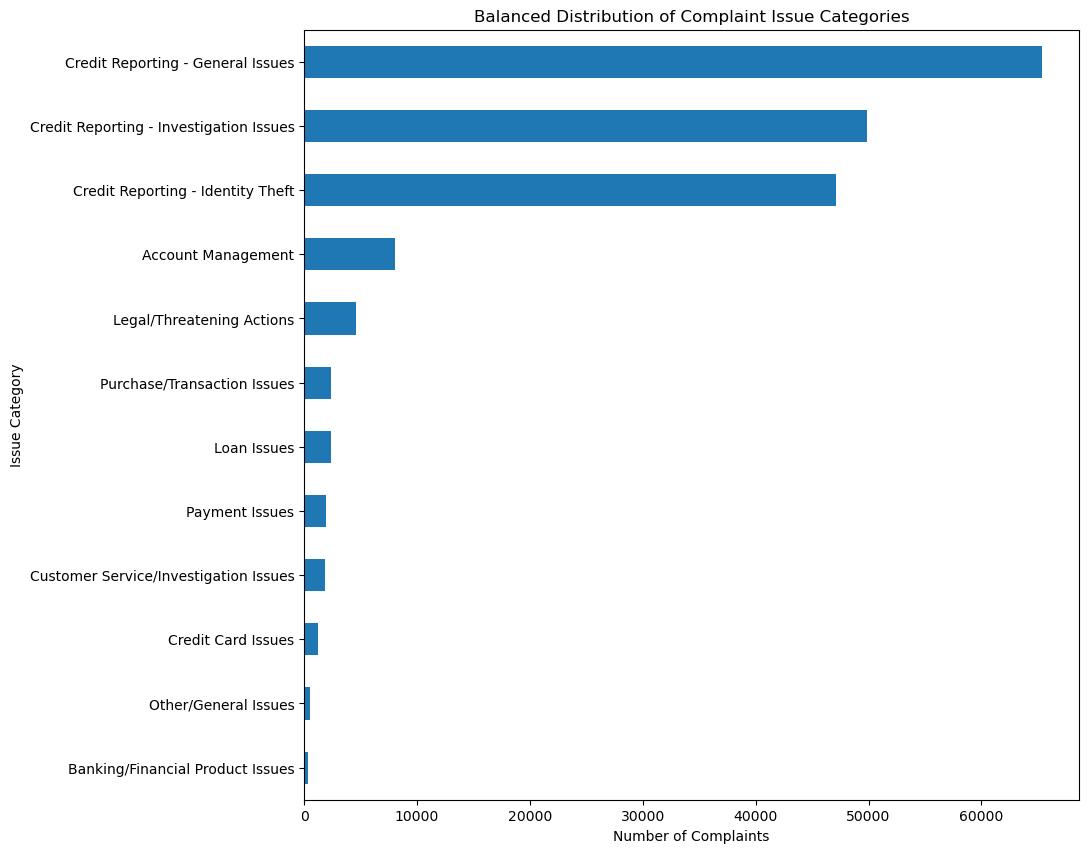

In [176]:
df['Issue_Category'] = df['Issue'].map(issue_mapping)

df['Issue_Category'].fillna('Other/General Issues', inplace=True)

balanced_counts = df['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
balanced_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Balanced Distribution of Complaint Issue Categories')
#plt.tight_layout()
plt.show()

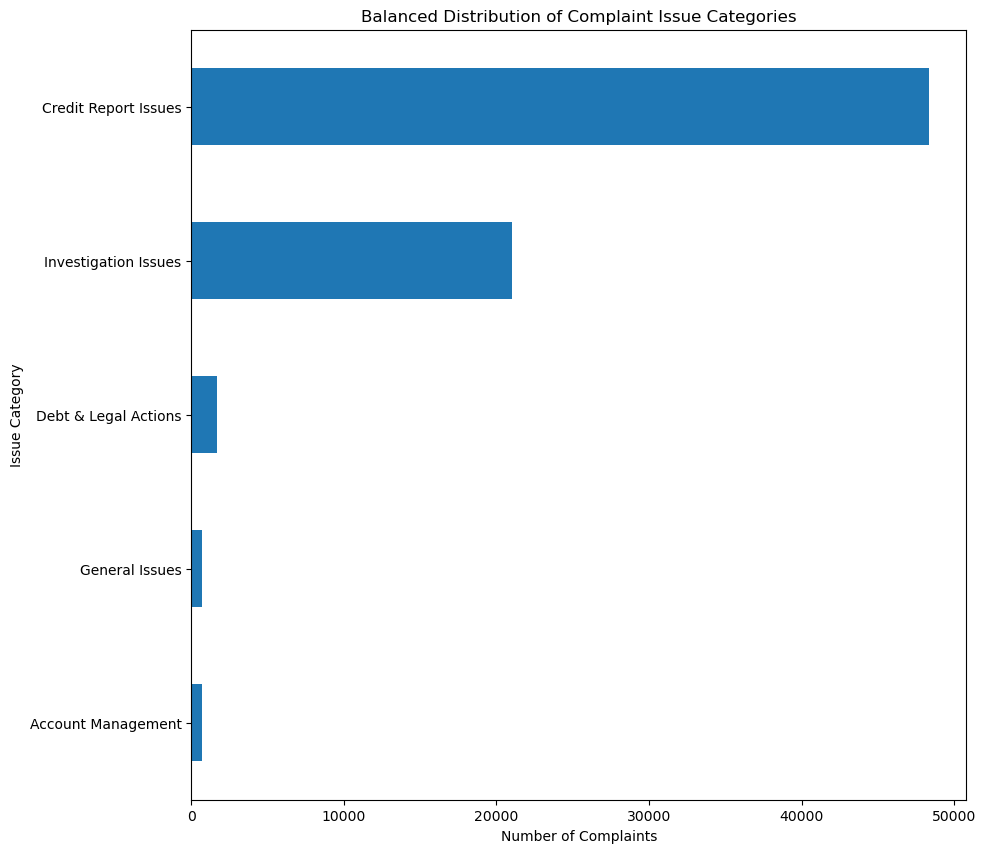

In [60]:
issue_mapping = {
    'Incorrect information on your report': 'Credit Report Issues',
    'Improper use of your report': 'Credit Report Issues',
    'Problem with a credit reporting company\'s investigation into an existing problem': 'Investigation Issues',
    'Problem with a company\'s investigation into an existing problem': 'Investigation Issues',
    'Problem with a company\'s investigation into an existing issue': 'Investigation Issues',
    'Managing an account': 'Account Management',
    'Closing an account': 'Account Management',
    'Opening an account': 'Account Management',
    'Closing your account': 'Account Management',
    'Problem with a lender or other company charging your account': 'Loan & Payment Issues',
    'Dealing with your lender or servicer': 'Loan & Payment Issues',
    'Managing the loan or lease': 'Loan & Payment Issues',
    'Problem caused by your funds being low': 'Loan & Payment Issues',
    'Problem when making payments': 'Loan & Payment Issues',
    'Fees or interest': 'Loan & Payment Issues',
    'Attempts to collect debt not owed': 'Debt & Legal Actions',
    'Took or threatened to take negative or legal action': 'Debt & Legal Actions',
    'Unable to get your credit report or credit score': 'Credit Card & Score Issues',
    'Getting a credit card': 'Credit Card & Score Issues',
    'Credit monitoring or identity theft protection services': 'Credit Card & Score Issues',
    'Identity theft protection or other monitoring services': 'Credit Card & Score Issues',
    'Problem with a purchase shown on your statement': 'General Issues',
    'Written notification about debt': 'General Issues',
    'False statements or representation': 'General Issues',
    'Other features, terms, or problems': 'General Issues',
}

# Apply the mapping to the dataframe
df_2022['Issue_Category'] = df_2022['Issue'].map(issue_mapping)

# Any issues not covered in the mapping will be considered 'Other/General Issues'
df_2022['Issue_Category'].fillna('Other/General Issues', inplace=True)

# Count the number of complaints per category
balanced_counts = df_2022['Issue_Category'].value_counts().sort_values(ascending=True)

# Plot the distribution
plt.figure(figsize=(10, 10))
balanced_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Balanced Distribution of Complaint Issue Categories')
#plt.tight_layout()
plt.show()

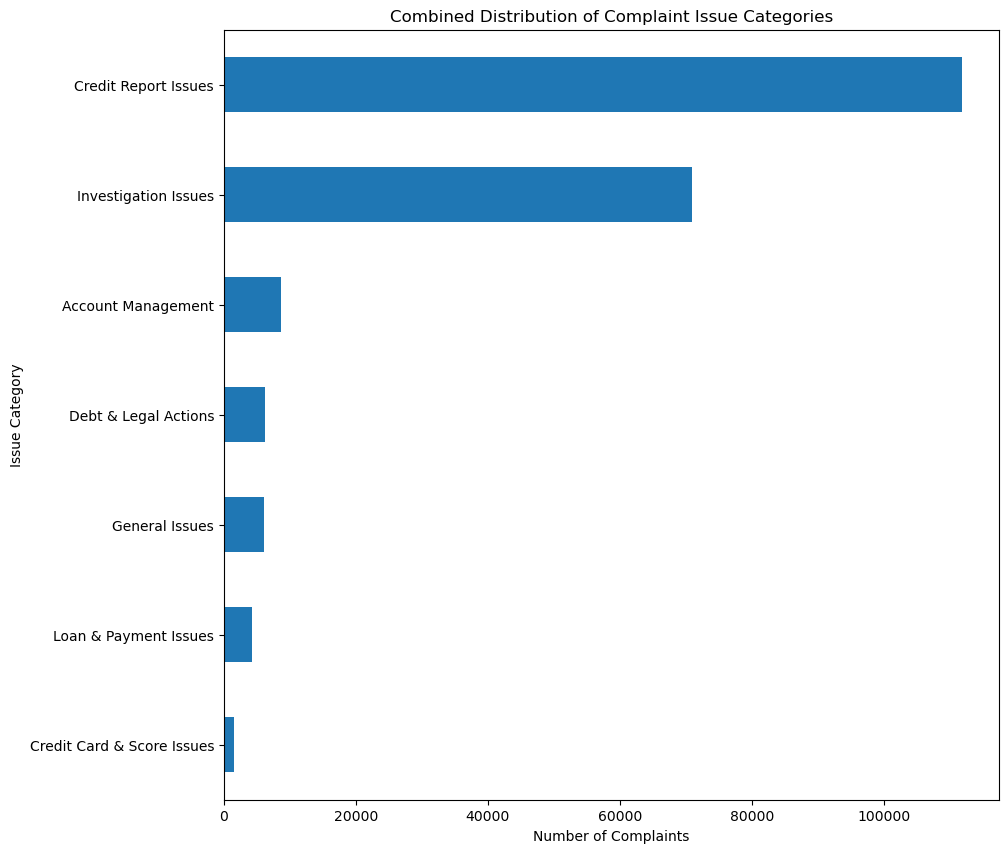

In [64]:
df_2022_filtered = df_2022[df_2022['Issue_Category'] != 'Credit Report Issues']

df_combined = pd.concat([df, df_2022_filtered], ignore_index=True)

combined_counts = df_combined['Issue_Category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
combined_counts.plot(kind='barh')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue Category')
plt.title('Combined Distribution of Complaint Issue Categories')
plt.show()


In [65]:
df = df_combined

In [80]:
df.head(10)

,Consumer complaint narrative,Issue,Sub-issue,Issue_Category
0,The credit bureaus keep disrespecting the laws...,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Investigation Issues
1,I sent in a complaint in XXXX of 2021 about so...,Incorrect information on your report,Information belongs to someone else,Credit Report Issues
2,I ordered a copy of my report and I found out ...,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Investigation Issues
3,It appears that my credit file has been compro...,Incorrect information on your report,Information belongs to someone else,Credit Report Issues
4,"I have never authorized, consented to nor bene...",Incorrect information on your report,Information belongs to someone else,Credit Report Issues
5,I sent a letter regarding inaccurate and unkno...,Problem with a credit reporting company's inve...,Investigation took more than 30 days,Investigation Issues
6,I strongly desire not to have this appear on m...,Incorrect information on your report,Information belongs to someone else,Credit Report Issues
7,"I purchased a car from XXXX XXXX XXXX, but the...",Incorrect information on your report,Account information incorrect,Credit Report Issues
8,In accordance with the Fair Credit Reporting A...,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Investigation Issues
9,I have been a victim of identify theft yet aga...,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,Investigation Issues


In [86]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop('Issue_Category', axis=1)  # This assumes 'Issue_Category' is the target variable
y = df['Issue_Category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('narrative_vect', TfidfVectorizer(), 'Consumer complaint narrative'),
        ('issue_encoder', OneHotEncoder(), ['Issue']),
        ('sub_issue_encoder', OneHotEncoder(), ['Sub-issue'])
    ],
    remainder='drop'
)

tfidf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [88]:

tfidf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('narrative_vect',
                                                  TfidfVectorizer(),
                                                  'Consumer complaint '
                                                  'narrative'),
                                                 ('issue_encoder',
                                                  OneHotEncoder(), ['Issue']),
                                                 ('sub_issue_encoder',
                                                  OneHotEncoder(),
                                                  ['Sub-issue'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [89]:
from sklearn.metrics import classification_report

y_pred = tfidf_pipeline.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


                            precision    recall  f1-score   support

        Account Management       1.00      1.00      1.00      3531
Credit Card & Score Issues       1.00      1.00      1.00       631
      Credit Report Issues       1.00      1.00      1.00     44765
      Debt & Legal Actions       1.00      1.00      1.00      2477
            General Issues       1.00      1.00      1.00      2507
      Investigation Issues       1.00      1.00      1.00     28321
     Loan & Payment Issues       1.00      1.00      1.00      1667

                  accuracy                           1.00     83899
                 macro avg       1.00      1.00      1.00     83899
              weighted avg       1.00      1.00      1.00     83899



In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(random_state=42))
])

In [91]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('narrative_vect',
                                                  TfidfVectorizer(),
                                                  'Consumer complaint '
                                                  'narrative'),
                                                 ('issue_encoder',
                                                  OneHotEncoder(), ['Issue']),
                                                 ('sub_issue_encoder',
                                                  OneHotEncoder(),
                                                  ['Sub-issue'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [92]:
y_pred = rf_pipeline.predict(X_test)

In [93]:
report = classification_report(y_test, y_pred)
print(report)

                            precision    recall  f1-score   support

        Account Management       0.92      0.99      0.96      3531
Credit Card & Score Issues       0.99      0.57      0.73       631
      Credit Report Issues       0.98      1.00      0.99     44765
      Debt & Legal Actions       1.00      0.92      0.96      2477
            General Issues       0.99      0.87      0.93      2507
      Investigation Issues       0.99      0.99      0.99     28321
     Loan & Payment Issues       1.00      0.83      0.91      1667

                  accuracy                           0.98     83899
                 macro avg       0.98      0.88      0.92     83899
              weighted avg       0.98      0.98      0.98     83899



In [94]:
from sklearn.svm import SVC

In [95]:
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

In [96]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('narrative_vect',
                                                  TfidfVectorizer(),
                                                  'Consumer complaint '
                                                  'narrative'),
                                                 ('issue_encoder',
                                                  OneHotEncoder(), ['Issue']),
                                                 ('sub_issue_encoder',
                                                  OneHotEncoder(),
                                                  ['Sub-issue'])])),
                ('classifier', SVC(random_state=42))])

In [97]:
y_pred = svm_pipeline.predict(X_test)

In [98]:
report = classification_report(y_test, y_pred)
print(report)

                            precision    recall  f1-score   support

        Account Management       1.00      1.00      1.00      3531
Credit Card & Score Issues       1.00      1.00      1.00       631
      Credit Report Issues       1.00      1.00      1.00     44765
      Debt & Legal Actions       1.00      1.00      1.00      2477
            General Issues       1.00      1.00      1.00      2507
      Investigation Issues       1.00      1.00      1.00     28321
     Loan & Payment Issues       1.00      1.00      1.00      1667

                  accuracy                           1.00     83899
                 macro avg       1.00      1.00      1.00     83899
              weighted avg       1.00      1.00      1.00     83899

